In [2]:
#Importing relevant libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
%matplotlib inline

In [3]:
#Loading the dataset and displayinng all the columns (Variables)

df = pd.read_csv("aids.csv")
pd.set_option('display.max_columns',None)

In [4]:
#To show the first five rows:

df.head()

Country  Year  Data.AIDS-Related Deaths.AIDS Orphans  \
0  Afghanistan  1990                                    100   
1      Algeria  1990                                    200   
2       Angola  1990                                   1300   
3    Argentina  1990                                    500   
4      Armenia  1990                                    100   

   Data.AIDS-Related Deaths.Adults  Data.AIDS-Related Deaths.All Ages  \
0                              100                                100   
1                              100                                100   
2                              500                               1000   
3                              200                                500   
4                              100                                100   

   Data.AIDS-Related Deaths.Children  Data.AIDS-Related Deaths.Female Adults  \
0                                100                                     100   
1                                100                                     100   
2                                500                                     200   
3                                100                                     100   
4                                100                                     100   

   Data.AIDS-Related Deaths.Male Adults  Data.HIV Prevalence.Adults  \
0                                   100                         0.1   
1                                   100                         0.1   
2                                   200                         0.2   
3                                   200                         0.1   
4                                   100                         0.1   

   Data.HIV Prevalence.Young Men  Data.HIV Prevalence.Young Women  \
0                            0.1                              0.1   
1                            0.1                              0.1   
2                            0.1                              0.2   
3                            0.1                              0.1   
4                            0.1                              0.1   

   Data.New HIV Infections.Young Adults  Data.New HIV Infections.Male Adults  \
0                                   100                                  100   
1                                   100                                  100   
2                                  2600                                 1200   
3                                  4100                                 3100   
4                                   100                                  100   

   Data.New HIV Infections.Female Adults  Data.New HIV Infections.Children  \
0                                    100                               100   
1                                    100                               100   
2                                   1700                              1000   
3                                   1200                               200   
4                                    100                               100   

   Data.New HIV Infections.All Ages  Data.New HIV Infections.Adults  \
0                               100                             100   
1                               100                             100   
2                              3400                            2800   
3                              4500                            4400   
4                               100                             100   

   Data.New HIV Infections.Incidence Rate Among Adults  \
0                                               0.01     
1                                               0.01     
2                                               0.47     
3                                               0.19     
4                                               0.01     

   Data.People Living with HIV.Total  Data.People Living with HIV.Male Adults  \
0                                500                       

In [6]:
#To rename the dataFrame columns (Headers) for ease of comprehension by readers:

df.rename(columns = {'Country':'Country', 'Year':'Year', 'Data.AIDS-Related Deaths.AIDS Orphans':'Children Ophaned Below 17',
       'Data.AIDS-Related Deaths.Adults':'Adults Death Above 15', 'Data.AIDS-Related Deaths.All Ages':'All Deaths',
       'Data.AIDS-Related Deaths.Children': 'All Children Death Below 14',
       'Data.AIDS-Related Deaths.Female Adults':'All Female Deaths Above 15',
       'Data.AIDS-Related Deaths.Male Adults':'All Male Deaths Above 15', 'Data.HIV Prevalence.Adults':'Percentage_Men 15-49 Living with AIDS',
       'Data.HIV Prevalence.Young Men':'Percentage_Men 15-24 Living with AIDS', 'Data.HIV Prevalence.Young Women':'Percentage_Women 15-24 Living with AIDS',
       'Data.New HIV Infections.Young Adults':'Adults AIDS Cases 15-49',
       'Data.New HIV Infections.Male Adults':'Adults Male Cases 15 and Above',
       'Data.New HIV Infections.Female Adults':'Adults Female Cases 15 and Above',
       'Data.New HIV Infections.Children':'Children AIDS Cases 0-14', 'Data.New HIV Infections.All Ages':'Total AIDS Cases',
       'Data.New HIV Infections.Adults':'All Adult AIDS Cases 15 and Above',
       'Data.New HIV Infections.Incidence Rate Among Adults':'HIV Rate Adults per 1000 15 and Above',
       'Data.People Living with HIV.Total':'Total People Living with HIV',
       'Data.People Living with HIV.Male Adults':'Total Males Adults Above 15 Living with HIV',
       'Data.People Living with HIV.Female Adults':'Total Females Adults Above 15 Living with HIV',
       'Data.People Living with HIV.Children':'Total Children Less 15 Living with HIV',
       'Data.People Living with HIV.Adults':'Total Adults Above 15 Living with HIV'},inplace = True)

In [7]:
#To show the internal component and attributes of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        2759 non-null   object 
 1   Year                                           2759 non-null   int64  
 2   Children Ophaned Below 17                      2759 non-null   int64  
 3   Adults Death Above 15                          2759 non-null   int64  
 4   All Deaths                                     2759 non-null   int64  
 5   All Children Death Below 14                    2759 non-null   int64  
 6   All Female Deaths Above 15                     2759 non-null   int64  
 7   All Male Deaths Above 15                       2759 non-null   int64  
 8   Percentage_Men 15-49 Living with AIDS          2759 non-null   float64
 9   Percentage_Men 15-24 Living with AIDS          2759 

In [7]:
#To show the Statistical features of the data set:

df.describe().T.round(2)

count       mean        std  \
Year                                           2759.0    2005.00       8.95   
Children Ophaned Below 17                      2759.0  104293.58  243708.70   
Adults Death Above 15                          2759.0    7755.16   18358.41   
All Deaths                                     2759.0   10171.80   23381.65   
All Children Death Below 14                    2759.0    2498.77    5395.97   
All Female Deaths Above 15                     2759.0    4134.03   10180.29   
All Male Deaths Above 15                       2759.0    3710.98    8376.38   
Percentage_Men 15-49 Living with AIDS          2759.0       2.60       5.01   
Percentage_Men 15-24 Living with AIDS          2759.0       0.68       1.25   
Percentage_Women 15-24 Living with AIDS        2759.0       1.75       3.68   
Adults AIDS Cases 15-49                        2759.0   15690.69   41952.70   
Adults Male Cases 15 and Above                 2759.0    7341.21   18184.16   
Adults Female Cases 15 and Above               2759.0    9440.38   26294.25   
Children AIDS Cases 0-14                       2759.0    3762.81    8363.54   
Total AIDS Cases                               2759.0   20377.06   51338.60   
All Adult AIDS Cases 15 and Above              2759.0   16714.57   44282.25   
HIV Rate Adults per 1000 15 and Above          2759.0       2.45       5.48   
Total People Living with HIV                   2759.0  229503.26  614009.94   
Total Males Adults Above 15 Living with HIV    2759.0   88794.31  222765.94   
Total Females Adults Above 15 Living with HIV  2759.0  120778.91  353383.15   
Total Children Less 15 Living with HIV         2759.0   20145.49   45998.11   
Total Adults Above 15 Living with HIV          2759.0  209527.65  573721.99   

                                                   min      25%      50%  \
Year                                           1990.00  1997.00   2005.0   
Children Ophaned Below 17                       100.00  1200.00  12000.0   
Adults Death Above 15                           100.00   200.00   1100.0   
All Deaths                                      100.00   500.00   1400.0   
All Children Death Below 14                     100.00   100.00    500.0   
All Female Deaths Above 15                      100.00   100.00    500.0   
All Male Deaths Above 15                        100.00   100.00   1000.0   
Percentage_Men 15-49 Living with AIDS             0.10     0.10      0.6   
Percentage_Men 15-24 Living with AIDS             0.10     0.10      0.1   
Percentage_Women 15-24 Living with AIDS           0.10     0.10      0.2   
Adults AIDS Cases 15-49                         100.00  1000.00   2700.0   
Adults Male Cases 15 and Above                  100.00   500.00   1600.0   
Adults Female Cases 15 and Above                100.00   500.00   1100.0   
Children AIDS Cases 0-14                        100.00   100.00    500.0   
Total AIDS Cases                                100.00  1000.00   3600.0   
All Adult AIDS Cases 15 and Above               100.00  1000.00   2900.0   
HIV Rate Adults per 1000 15 and Above             0.01     0.14      0.4   
Total People Living with HIV                    100.00  7900.00  37000.0   
Total Males Adults Above 15 Living with HIV     100.00  4300.00  17000.0   
Total Females Adults Above 15 Living with HIV   100.00  2700.00  13000.0   
Total Children Less 15 Living with HIV          100.00   200.00   1700.0   
Total Adults Above 15 Living with HIV           100.00  7500.00  34000.0   

                                                     75%         max  
Year                                             2013.00     2020.00  
Children Ophaned Below 17                       66000.00  1800000.00  
Adults Death Above 15                            5000.00   220000.00  
All Deaths                                       6600.00   270000.00  
All Children Death Below 14                      1700.00    49000.00  
All Female Deaths Above 15                       2400.0

In [23]:
#To show the number of rows and columns in the DataFrame
df.shape

(2759, 23)

In [8]:
#To display the total number of Countries in the data set
n = len(pd.unique(df['Country']))
print("The data set contains a total of ",n , "Countries")

The data set contains a total of  89 Countries


In [9]:
#To show the total unique Years the data set covers

y = len(pd.unique(df['Year']))
print("The data set ranges from 1990 to 2020 which is a total",y , "Years")

The data set ranges from 1990 to 2020 which is a total 31 Years


In [10]:
#To obtain the sum of the following variables:
ophaned  = df['Children Ophaned Below 17'].sum()
print("The total number of children below 17 ophaned in the selected countries between (1990-2020) due to HIV infection is :", ophaned, '\n')

adultsD15  = df['Adults Death Above 15'].sum()
print("The total number of Adult Deaths Above 15 in the selected countries between (1990-2020) due to HIV infection is :", adultsD15, '\n')

childrenbelow14  = df['All Children Death Below 14'].sum()
print("The total number of All Children Death Below 14 in the selected countries between (1990-2020) due to HIV infection is :", childrenbelow14, '\n')

femaleDAvove15  = df['All Female Deaths Above 15'].sum()
print("The total number of all female Death above 15 in the selected countries between (1990-2020) due to HIV infection is :", femaleDAvove15, '\n')

TotalAdtultsOver15  = df['Total Adults Above 15 Living with HIV'].sum()
print("The Total Adults Above 15 Living with HIV in the selected countries between (1990-2020) due to HIV infection is :", TotalAdtultsOver15, '\n')

TotalChildrenless15  = df['Total Children Less 15 Living with HIV'].sum()
print("The 'Total Children Less 15 Living with HIV' in the selected countries between (1990-2020) due to HIV infection is :", TotalChildrenless15, '\n')

TotalFemalesAdultsAbove15LivingwithHIV  = df['Total Females Adults Above 15 Living with HIV'].sum()
print("The Total Females Adults Above 15 Living with HIV in the selected countries between (1990-2020) due to HIV infection is :", TotalFemalesAdultsAbove15LivingwithHIV, '\n')

AllDeaths  = df['All Deaths'].sum()
print("The All Deaths in the selected countries between (1990-2020) due to HIV infection is :", femaleDAvove15, '\n')

The total number of children below 17 ophaned in the selected countries between (1990-2020) due to HIV infection is : 287746000 

The total number of Adult Deaths Above 15 in the selected countries between (1990-2020) due to HIV infection is : 21396500 

The total number of All Children Death Below 14 in the selected countries between (1990-2020) due to HIV infection is : 6894100 

The total number of all female Death above 15 in the selected countries between (1990-2020) due to HIV infection is : 11405800 

The Total Adults Above 15 Living with HIV in the selected countries between (1990-2020) due to HIV infection is : 578086800 

The 'Total Children Less 15 Living with HIV' in the selected countries between (1990-2020) due to HIV infection is : 55581400 

The Total Females Adults Above 15 Living with HIV in the selected countries between (1990-2020) due to HIV infection is : 333229000 

The All Deaths in the selected countries between (1990-2020) due to HIV infection is : 11405800 



In [11]:
#To show the Top 15 Countries with the highest rate of Children Ophaned below 17 in Percentage:

df.groupby('Country').sum()['Children Ophaned Below 17'].sort_values(ascending = False)[:15]/287746000*100

Country
South Africa                        10.646542
Uganda                               8.583959
Kenya                                7.956670
United Republic of Tanzania          7.654320
Zimbabwe                             7.172298
Zambia                               5.978884
Nigeria                              5.900690
Mozambique                           5.571963
Malawi                               4.980782
Ethiopia                             4.189806
Côte d'Ivoire                        3.576071
Democratic Republic of the Congo     3.571205
Thailand                             2.192385
Cameroon                             2.109152
Ghana                                1.682039
Name: Children Ophaned Below 17, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Children Ophaned Below 17'>

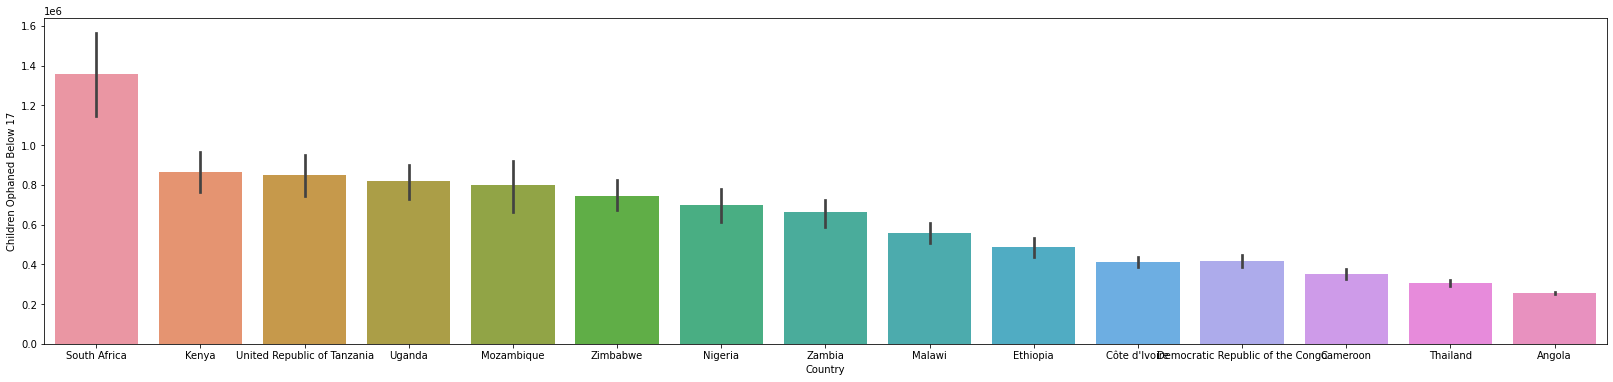

In [12]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Children Ophaned Below 17',
    data=df.nlargest(320, 'Children Ophaned Below 17')
)

In [13]:
#To show the Top 15 Countries with the highest rate of Adults Death Above 15 in Percentage:
df.groupby('Country').sum()['Adults Death Above 15'].sort_values(ascending = False)[:15]/21396500*100


Country
South Africa                        14.221485
Zimbabwe                             7.678826
Kenya                                6.788961
United Republic of Tanzania          6.561821
Uganda                               6.286075
Nigeria                              5.913584
Zambia                               4.482041
Malawi                               4.481107
Mozambique                           4.411002
Ethiopia                             3.868857
Côte d'Ivoire                        3.852032
Thailand                             3.843619
Democratic Republic of the Congo     3.666020
Cameroon                             2.061552
Ghana                                1.768514
Name: Adults Death Above 15, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Adults Death Above 15'>

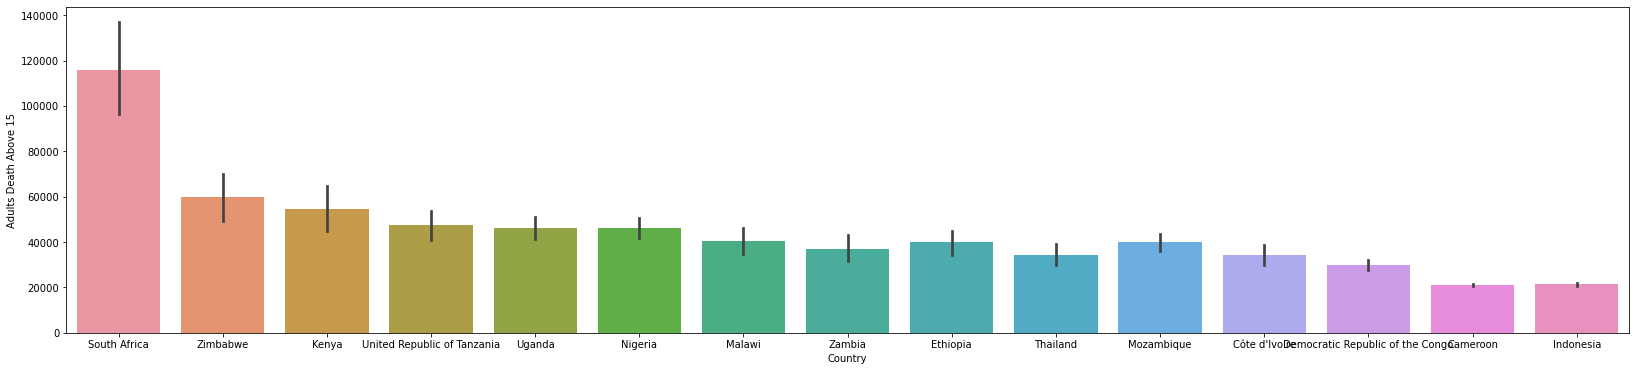

In [286]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Adults Death Above 15',
    data=df.nlargest(320, 'Adults Death Above 15')
)


In [122]:
#To show the Top 15 Countries with the highest rate of All Deaths in Percentage:
df.groupby('Country').sum()['All Deaths'].sort_values(ascending = False)[:15]/28064000*100

Country
South Africa                        13.000641
Zimbabwe                             7.547035
Kenya                                7.101625
Uganda                               6.784493
United Republic of Tanzania          6.748860
Nigeria                              6.128848
Malawi                               4.749857
Zambia                               4.714225
Mozambique                           4.702822
Ethiopia                             4.058580
Democratic Republic of the Congo     3.980188
Côte d'Ivoire                        3.671608
Thailand                             3.142104
Cameroon                             2.162913
Ghana                                1.832241
Name: All Deaths, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='All Deaths'>

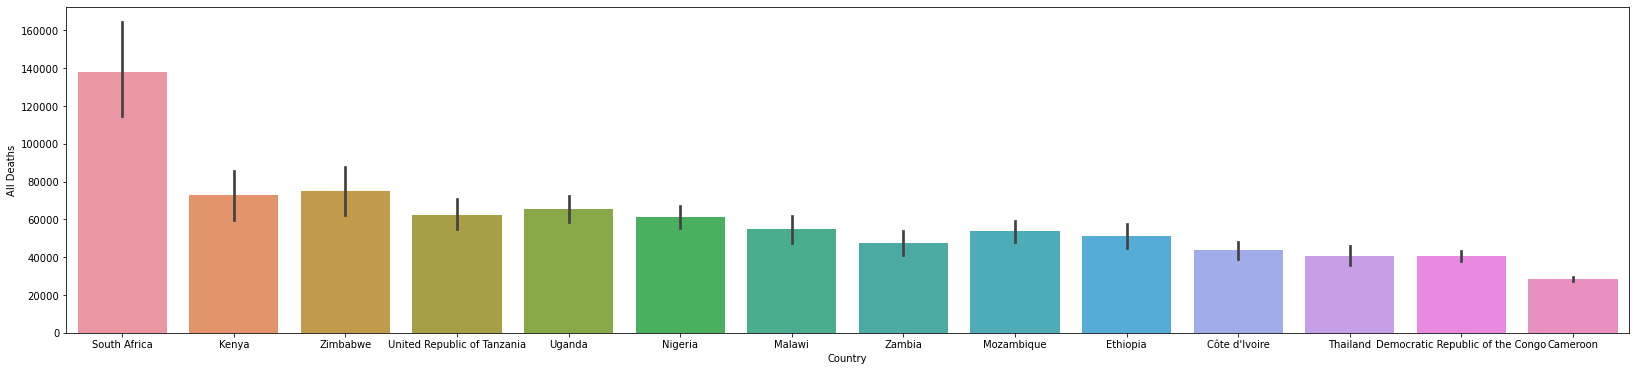

In [15]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='All Deaths',
    data=df.nlargest(320, 'All Deaths')
)


In [17]:
#To show the Top 15 Countries with the highest rate of All Children Death Below 14 in Percentage:
df.groupby('Country').sum()['All Children Death Below 14'].sort_values(ascending = False)[:15]/6894100*100

Country
South Africa                        8.700193
Uganda                              8.060516
Kenya                               7.932870
United Republic of Tanzania         7.188756
Zimbabwe                            6.866741
Nigeria                             6.588242
Mozambique                          5.449587
Malawi                              5.377062
Zambia                              5.217505
Democratic Republic of the Congo    4.792504
Ethiopia                            4.579278
Côte d'Ivoire                       2.969206
Cameroon                            2.393351
Ghana                               1.933537
Burkina Faso                        1.821848
Name: All Children Death Below 14, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='All Children Death Below 14'>

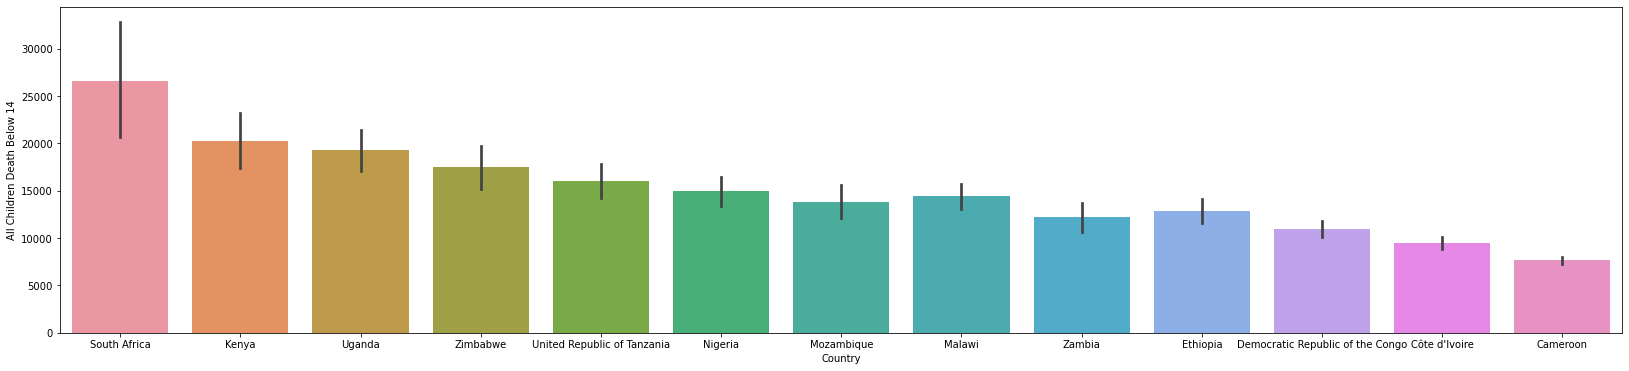

In [18]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='All Children Death Below 14',
    data=df.nlargest(320, 'All Children Death Below 14')
)

In [116]:
#To show the Top 15 Countries with the highest rate of All Female Deaths Above 15 in Percentage:

df.groupby('Country').sum()['All Female Deaths Above 15'].sort_values(ascending = False)[:15]/6894100*100

Country
South Africa                        23.189394
Zimbabwe                            12.677507
Kenya                               12.359844
Uganda                              11.050028
United Republic of Tanzania         10.807792
Nigeria                              9.100535
Democratic Republic of the Congo     8.160601
Malawi                               8.095328
Mozambique                           7.887904
Zambia                               7.748655
Ethiopia                             6.924762
Côte d'Ivoire                        5.989179
Cameroon                             4.045488
Thailand                             3.965710
Ghana                                3.405811
Name: All Female Deaths Above 15, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='All Female Deaths Above 15'>

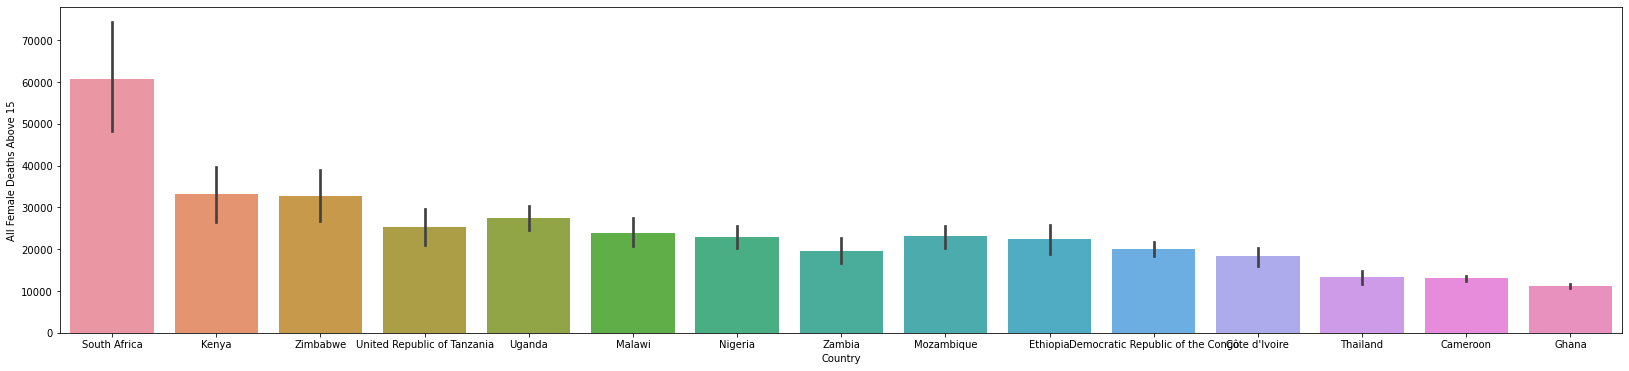

In [117]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='All Female Deaths Above 15',
    data=df.nlargest(320, 'All Female Deaths Above 15')
)

In [21]:
#To show the Top 15 Countries with the highest rate of Percentage_Men 15-49 Living with AIDS in Percentage:

df.groupby('Country').sum()['Percentage_Men 15-49 Living with AIDS'].sort_values(ascending = False)[:15]/7175.8*100

Country
Eswatini                       9.275621
Botswana                       9.270047
Lesotho                        8.307088
Zimbabwe                       7.783104
South Africa                   5.726191
Zambia                         5.295577
Malawi                         5.023830
Namibia                        4.871931
Mozambique                     3.849048
Uganda                         3.298587
Kenya                          2.969704
United Republic of Tanzania    2.285459
Côte d'Ivoire                  2.080604
Gabon                          1.743360
Congo                          1.728030
Name: Percentage_Men 15-49 Living with AIDS, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Percentage_Men 15-49 Living with AIDS'>

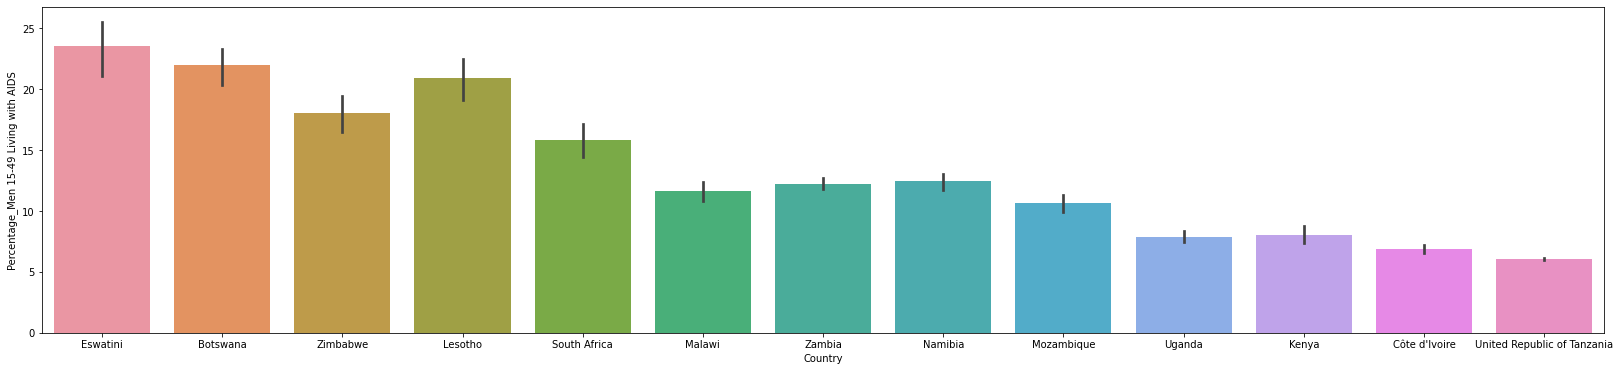

In [22]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Percentage_Men 15-49 Living with AIDS',
    data=df.nlargest(320, 'Percentage_Men 15-49 Living with AIDS')
)

In [23]:
#To show the Top 15 Countries with the highest rate of Percentage_Men 15-24 Living with AIDS in Percentage:

df.groupby('Country').sum()['Percentage_Men 15-24 Living with AIDS'].sort_values(ascending = False)[:15]/1879.1*100

Country
Botswana                       9.483263
Eswatini                       8.009153
Zimbabwe                       7.918684
Lesotho                        7.248151
South Africa                   6.657442
Zambia                         4.922569
Namibia                        4.688415
Mozambique                     4.087063
Malawi                         3.911447
Kenya                          3.182375
Uganda                         2.581023
United Republic of Tanzania    2.474589
Thailand                       1.713586
Côte d'Ivoire                  1.522005
Cameroon                       1.415571
Name: Percentage_Men 15-24 Living with AIDS, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Percentage_Men 15-24 Living with AIDS'>

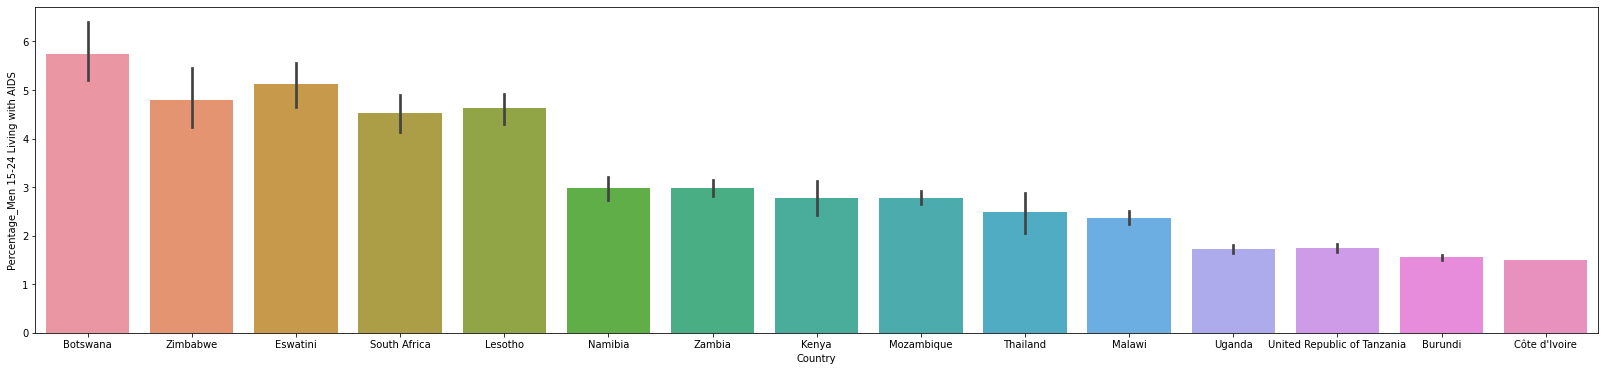

In [24]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Percentage_Men 15-24 Living with AIDS',
    data=df.nlargest(320, 'Percentage_Men 15-24 Living with AIDS')
)

In [25]:
#To show the Top 15 Countries with the highest rate of Percentage_Women 15-24 Living with AIDS in Percentage:

df.groupby('Country').sum()['Percentage_Women 15-24 Living with AIDS'].sort_values(ascending = False)[:15]/4840.1*100

Country
Eswatini                       10.981178
Botswana                        9.361377
Lesotho                         7.822152
Zimbabwe                        7.760170
South Africa                    7.508109
Zambia                          5.396583
Malawi                          4.989566
Namibia                         4.404868
Mozambique                      4.280903
Kenya                           3.355303
Uganda                          3.198281
Gabon                           2.103262
United Republic of Tanzania     2.074337
Congo                           1.956571
Côte d'Ivoire                   1.946241
Name: Percentage_Women 15-24 Living with AIDS, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Percentage_Women 15-24 Living with AIDS'>

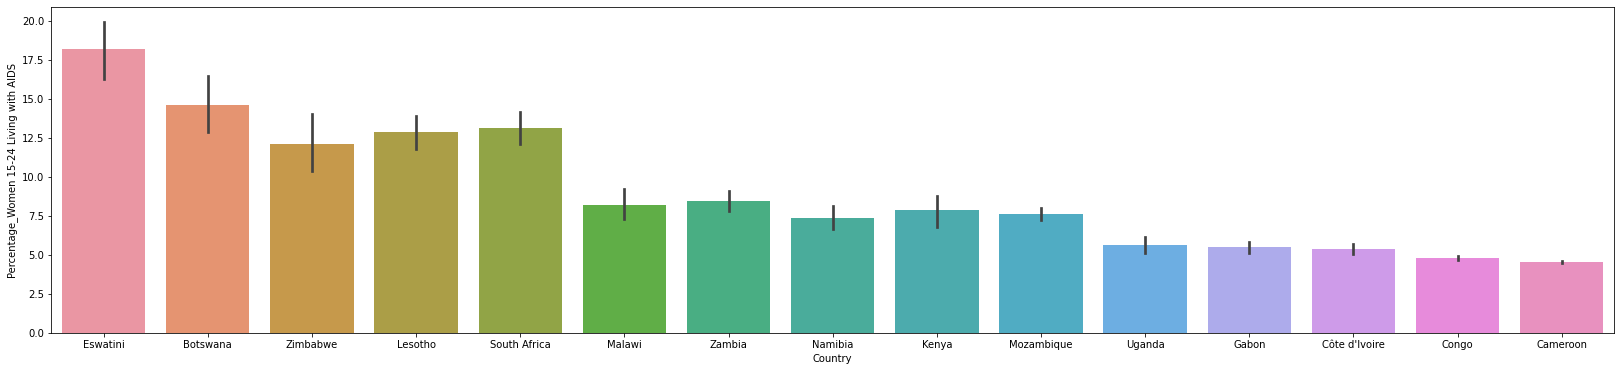

In [26]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Percentage_Women 15-24 Living with AIDS',
    data=df.nlargest(320, 'Percentage_Women 15-24 Living with AIDS')
)

In [27]:
#To show the Top 15 Countries with the highest rate of Adults AIDS Cases 15-49 in Percentage:

df.groupby('Country').sum()['Adults AIDS Cases 15-49'].sort_values(ascending = False)[:15]/43290600*100

Country
South Africa                        22.974965
Mozambique                           6.458677
Nigeria                              6.010543
United Republic of Tanzania          5.908904
Kenya                                5.617848
Zimbabwe                             5.615538
Zambia                               4.746989
Uganda                               4.335814
Malawi                               3.672853
Thailand                             2.902016
Ethiopia                             2.529417
Côte d'Ivoire                        2.208332
Democratic Republic of the Congo     2.106693
Cameroon                             1.969943
Indonesia                            1.802701
Name: Adults AIDS Cases 15-49, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Adults AIDS Cases 15-49'>

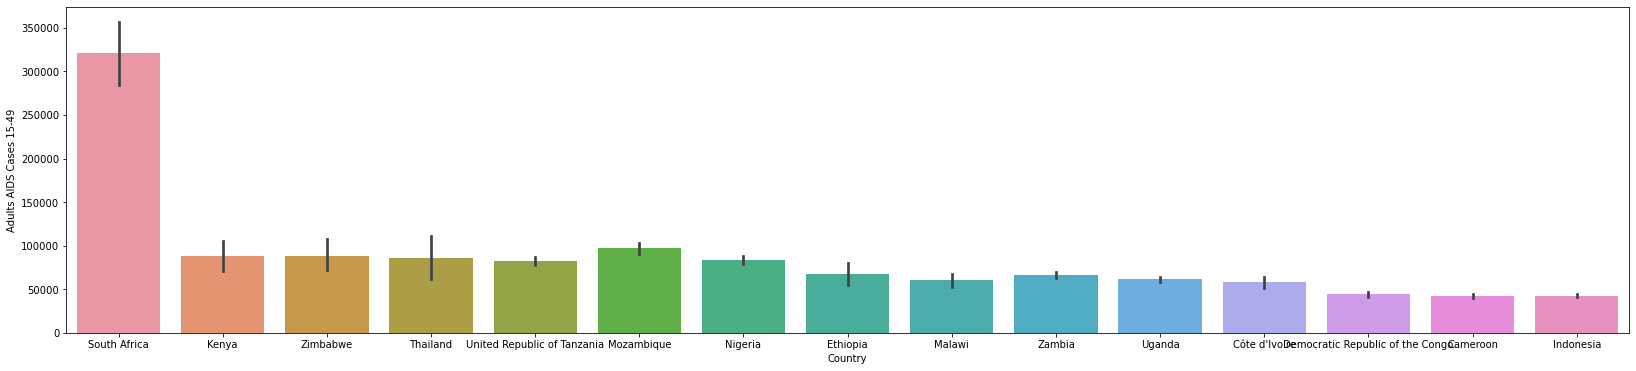

In [28]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Adults AIDS Cases 15-49',
    data=df.nlargest(320, 'Adults AIDS Cases 15-49')
)

In [29]:
#To show the Top 15 Countries with the highest rate of Adults Male Cases 15 and Above in Percentage:

df.groupby('Country').sum()['Adults Male Cases 15 and Above'].sort_values(ascending = False)[:15]/20254400*100

Country
South Africa                   20.528873
Nigeria                         6.141875
United Republic of Tanzania     5.924639
Zimbabwe                        5.689134
Mozambique                      5.622976
Kenya                           4.779208
Zambia                          4.478039
Uganda                          3.984319
Thailand                        3.915199
Malawi                          3.389387
Indonesia                       2.569812
Côte d'Ivoire                   2.464156
Ethiopia                        2.306659
Cameroon                        1.572004
Viet Nam                        1.445118
Name: Adults Male Cases 15 and Above, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Adults Male Cases 15 and Above'>

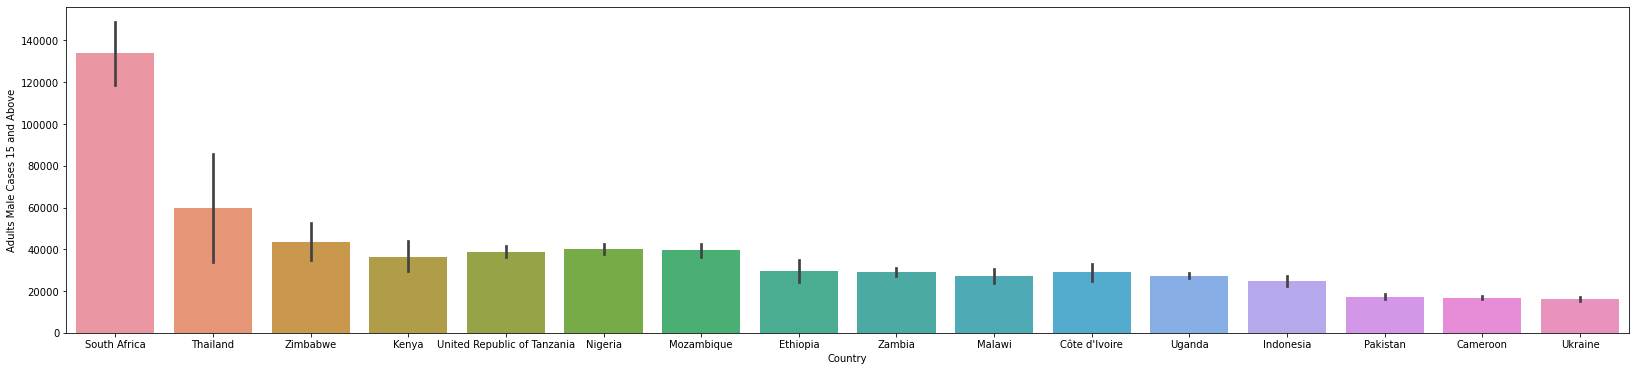

In [30]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Adults Male Cases 15 and Above',
    data=df.nlargest(320, 'Adults Male Cases 15 and Above')
)

In [31]:
#To show the Top 15 Countries with the highest rate of Adults Female Cases 15 and Above in Percentage:

df.groupby('Country').sum()['Adults Female Cases 15 and Above'].sort_values(ascending = False)[:15]/20254400*100

Country
South Africa                        30.892053
Mozambique                           8.956079
United Republic of Tanzania          8.210562
Kenya                                7.899518
Nigeria                              7.682281
Zimbabwe                             7.094755
Zambia                               6.349238
Uganda                               5.796271
Malawi                               5.070503
Democratic Republic of the Congo     3.562189
Ethiopia                             3.509855
Cameroon                             3.020578
Côte d'Ivoire                        2.971206
Thailand                             2.321965
Ghana                                2.048938
Name: Adults Female Cases 15 and Above, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Adults Female Cases 15 and Above'>

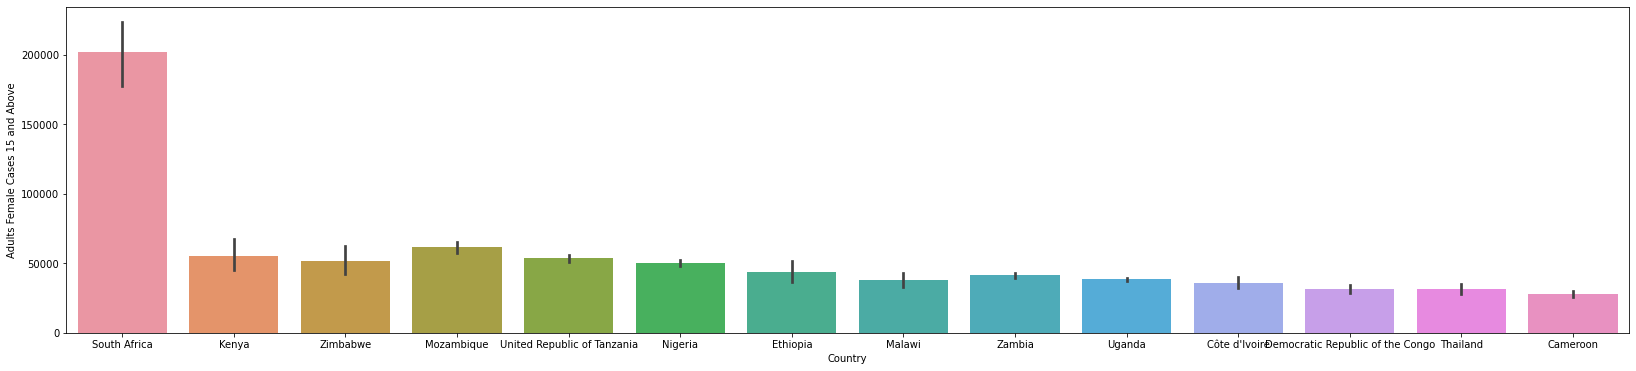

In [33]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Adults Female Cases 15 and Above',
    data=df.nlargest(320, 'Adults Female Cases 15 and Above')
)

In [34]:
df['Total AIDS Cases'].sum()

56220300

In [35]:
#To show the Top 15 Countries with the highest rate of Total AIDS Cases in Percentage:

df.groupby('Country').sum()['Total AIDS Cases'].sort_values(ascending = False)[:15]/56220300*100

Country
South Africa                        20.558410
United Republic of Tanzania          6.392709
Mozambique                           6.378479
Nigeria                              6.259305
Kenya                                5.996055
Zimbabwe                             5.807511
Uganda                               4.903923
Zambia                               4.843446
Malawi                               4.016343
Ethiopia                             2.906423
Democratic Republic of the Congo     2.630722
Côte d'Ivoire                        2.461033
Thailand                             2.388817
Cameroon                             2.081099
Indonesia                            1.490565
Name: Total AIDS Cases, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Total AIDS Cases'>

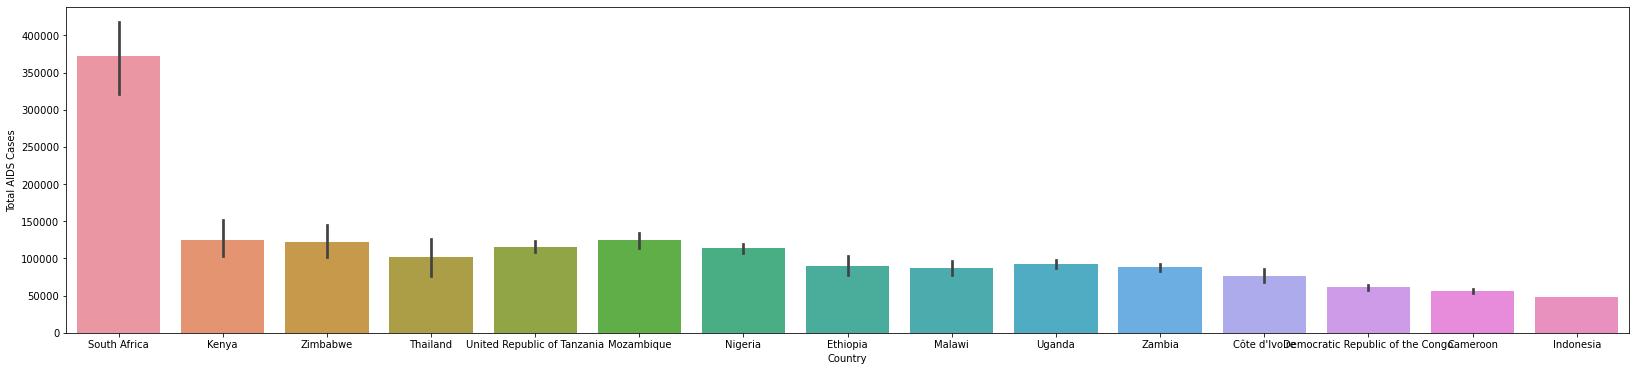

In [36]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Total AIDS Cases',
    data=df.nlargest(320, 'Total AIDS Cases')
)

In [375]:
df['Children AIDS Cases 0-14'].sum()

10381600

In [37]:
#To show the Top 15 Countries with the highest rate of Children AIDS Cases 0-14 in Percentage:

df.groupby('Country').sum()['Children AIDS Cases 0-14'].sort_values(ascending = False)[:15]/10381600*100

Country
South Africa                        10.666949
Kenya                                7.733875
Uganda                               7.553749
United Republic of Tanzania          7.156893
Nigeria                              6.993142
Zimbabwe                             6.458542
Mozambique                           5.986553
Malawi                               5.383563
Zambia                               5.243893
Democratic Republic of the Congo     4.743007
Ethiopia                             4.491601
Côte d'Ivoire                        2.771249
Cameroon                             2.294444
Ghana                                1.882176
Burkina Faso                         1.741543
Name: Children AIDS Cases 0-14, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Children AIDS Cases 0-14'>

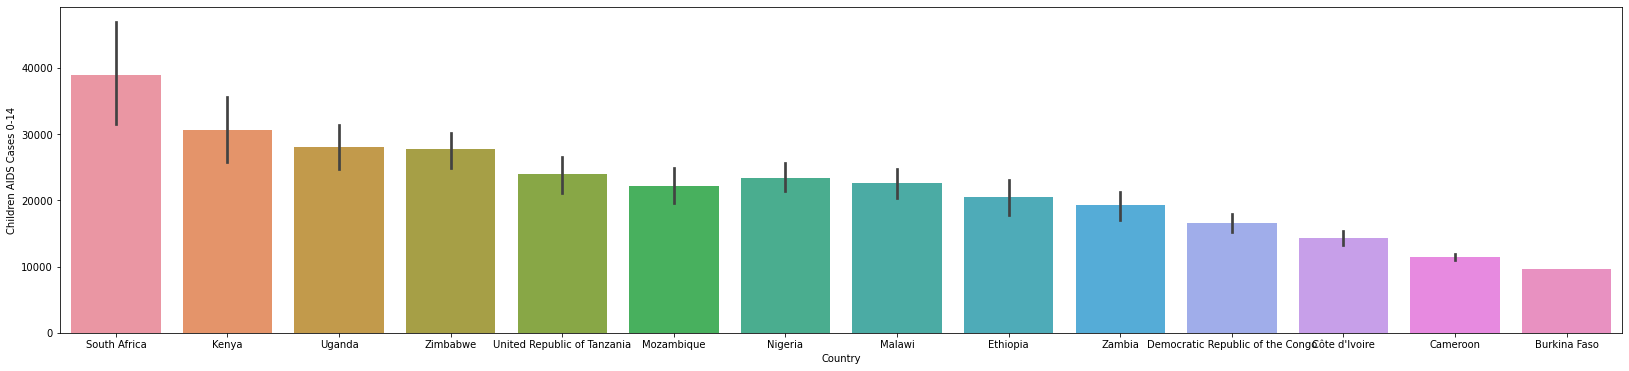

In [38]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Children AIDS Cases 0-14',
    data=df.nlargest(320, 'Children AIDS Cases 0-14')
)

In [376]:
df['All Adult AIDS Cases 15 and Above'].sum()

46115500

In [39]:
#To show the Top 15 Countries with the highest rate of All Adult AIDS Cases 15 and Above in Percentage:

df.groupby('Country').sum()['All Adult AIDS Cases 15 and Above'].sort_values(ascending = False)[:15]/46115500*100

Country
South Africa                        22.684347
Mozambique                           6.388308
United Republic of Tanzania          6.225672
Nigeria                              6.084722
Zimbabwe                             5.594648
Kenya                                5.570795
Zambia                               4.746777
Uganda                               4.306578
Malawi                               3.714586
Thailand                             2.738125
Ethiopia                             2.553155
Côte d'Ivoire                        2.385966
Democratic Republic of the Congo     2.133773
Cameroon                             2.014507
Indonesia                            1.694875
Name: All Adult AIDS Cases 15 and Above, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='All Adult AIDS Cases 15 and Above'>

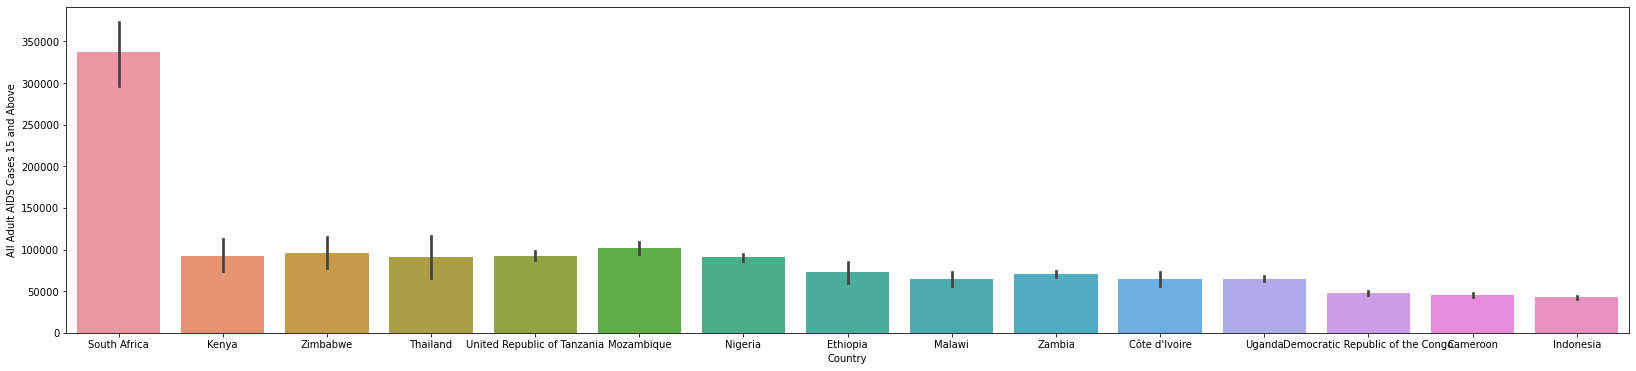

In [40]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='All Adult AIDS Cases 15 and Above',
    data=df.nlargest(320, 'All Adult AIDS Cases 15 and Above')
)

In [377]:
df['HIV Rate Adults per 1000 15 and Above'].sum()

6750.469999999999

In [396]:
#To show the Top 15 Countries with the highest rate of HIV Rate Adults per 1000 15 and Above in Percentage:

df.groupby('Country').sum()['HIV Rate Adults per 1000 15 and Above'].sort_values(ascending = False)[:15]/6750.469999999999*100

Country
Eswatini                       11.031232
Botswana                        9.834278
Lesotho                         9.323055
Zimbabwe                        7.459481
South Africa                    5.509839
Zambia                          5.482729
Namibia                         5.175343
Malawi                          4.614494
Mozambique                      4.556423
Kenya                           2.740106
Uganda                          2.653889
United Republic of Tanzania     2.374057
Côte d'Ivoire                   2.043710
Cameroon                        1.620480
Congo                           1.540337
Name: HIV Rate Adults per 1000 15 and Above, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='HIV Rate Adults per 1000 15 and Above'>

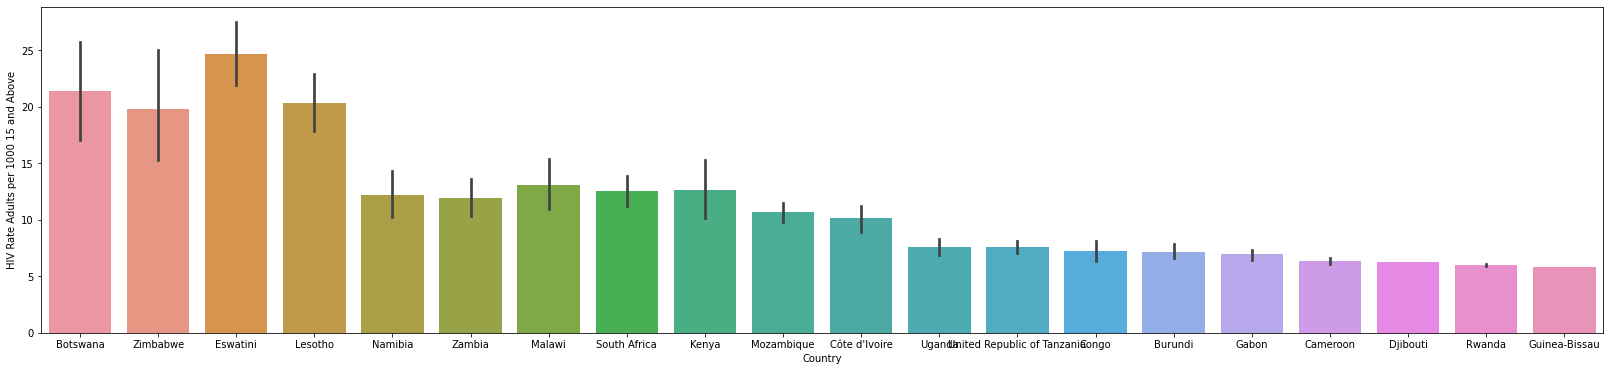

In [397]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='HIV Rate Adults per 1000 15 and Above',
    data=df.nlargest(320, 'HIV Rate Adults per 1000 15 and Above')
)

In [378]:
df['Total People Living with HIV'].sum()

633199500

In [394]:
#To show the Top 15 Countries with the highest rate of Total People Living with HIV in Percentage:

df.groupby('Country').sum()['Total People Living with HIV'].sort_values(ascending = False)[:15]/633199500*100

Country
South Africa                        20.917578
Kenya                                6.639298
Zimbabwe                             6.370820
United Republic of Tanzania          6.083391
Nigeria                              5.731211
Uganda                               5.435886
Mozambique                           5.406827
Zambia                               4.862606
Malawi                               4.287748
Ethiopia                             3.322807
Thailand                             3.070122
Côte d'Ivoire                        2.577387
Democratic Republic of the Congo     2.552118
Cameroon                             1.927986
Ghana                                1.354391
Name: Total People Living with HIV, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Total People Living with HIV'>

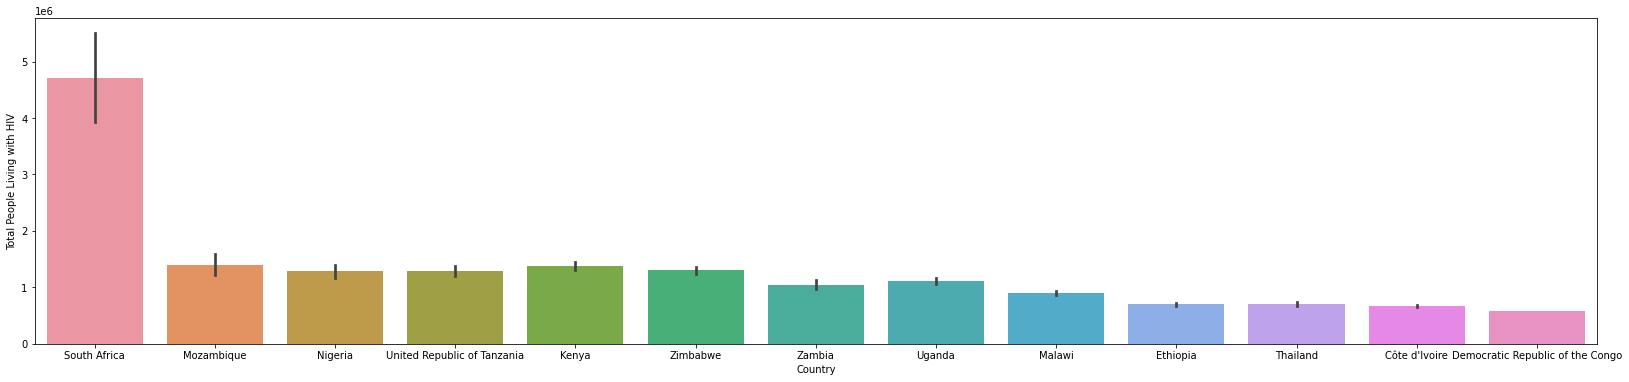

In [395]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Total People Living with HIV',
    data=df.nlargest(320, 'Total People Living with HIV')
)

In [379]:
df['Total Males Adults Above 15 Living with HIV'].sum()

244983500

In [392]:
#To show the Top 15 Countries with the highest rate of Total Males Adults Above 15 Living with HIV in Percentage:

df.groupby('Country').sum()['Total Males Adults Above 15 Living with HIV'].sort_values(ascending = False)[:15]/244983500*100

Country
South Africa                        19.878073
Zimbabwe                             6.388185
Nigeria                              5.873865
United Republic of Tanzania          5.771817
Kenya                                5.739162
Uganda                               4.922781
Thailand                             4.800323
Mozambique                           4.799507
Zambia                               4.583982
Malawi                               3.726782
Ethiopia                             2.885909
Côte d'Ivoire                        2.538947
Indonesia                            2.000012
Cameroon                             1.556431
Democratic Republic of the Congo     1.544594
Name: Total Males Adults Above 15 Living with HIV, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Total Males Adults Above 15 Living with HIV'>

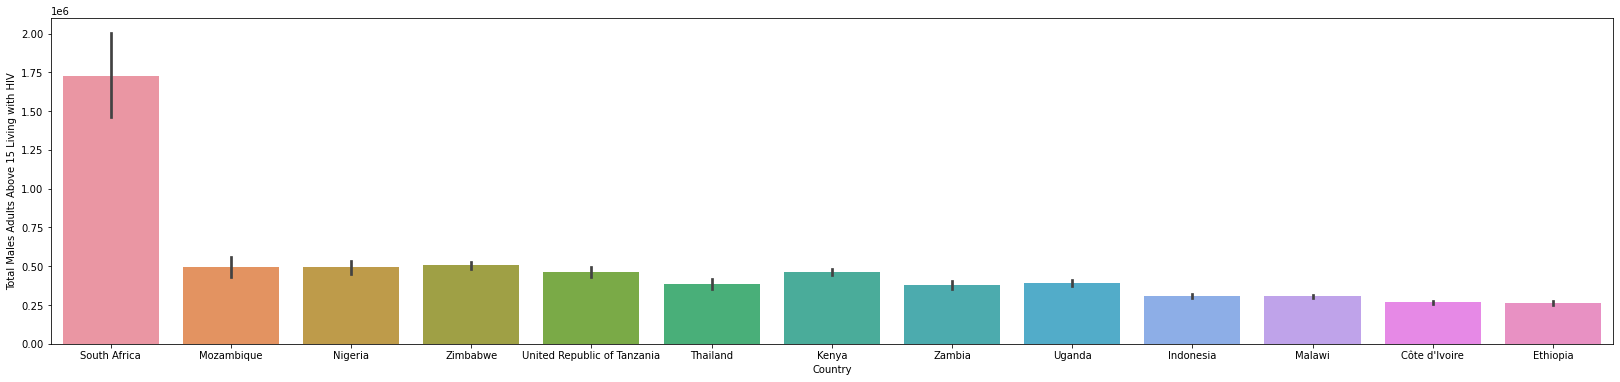

In [393]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Total Males Adults Above 15 Living with HIV',
    data=df.nlargest(320, 'Total Males Adults Above 15 Living with HIV')
)

In [380]:
df['Total Females Adults Above 15 Living with HIV'].sum()

333229000

In [391]:
#To show the Top 15 Countries with the highest rate of Total Females Adults Above 15 Living with HIV in Percentage:

df.groupby('Country').sum()['Total Females Adults Above 15 Living with HIV'].sort_values(ascending = False)[:15]/333229000*100

Country
South Africa                        23.157948
Kenya                                6.995189
Zimbabwe                             6.292970
United Republic of Tanzania          6.136921
Mozambique                           5.798715
Nigeria                              5.545736
Uganda                               5.419696
Zambia                               4.975557
Malawi                               4.441390
Ethiopia                             3.352049
Democratic Republic of the Congo     2.937920
Côte d'Ivoire                        2.553799
Thailand                             2.201189
Cameroon                             2.174181
Ghana                                1.484265
Name: Total Females Adults Above 15 Living with HIV, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Total Females Adults Above 15 Living with HIV'>

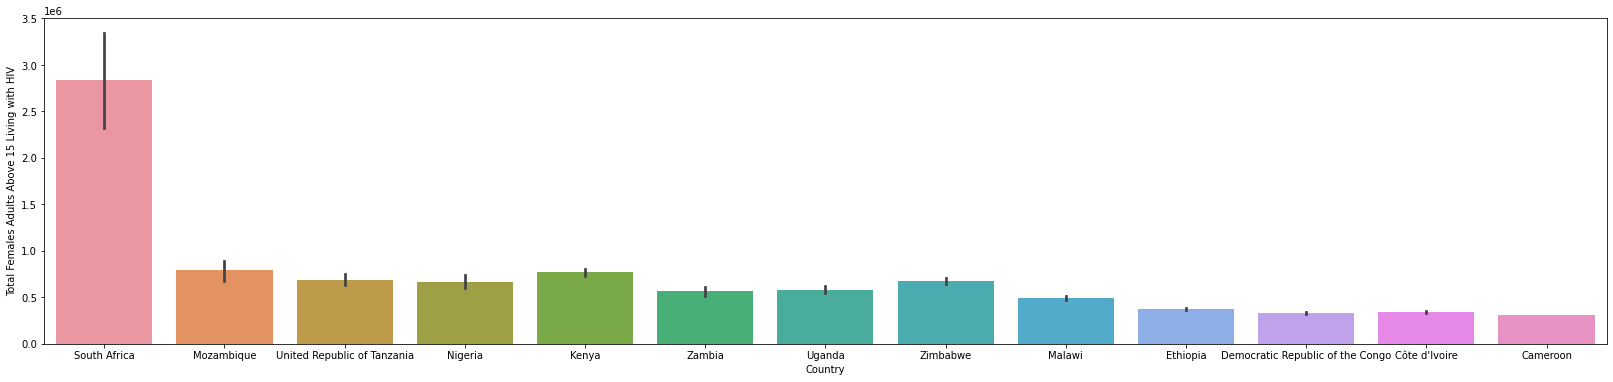

In [390]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Total Females Adults Above 15 Living with HIV',
    data=df.nlargest(320, 'Total Females Adults Above 15 Living with HIV')
)

In [381]:
df['Total Children Less 15 Living with HIV'].sum()

55581400

In [387]:
#To show the Top 15 Countries with the highest rate of Total Children Less 15 Living with HIV in Percentage:

df.groupby('Country').sum()['Total Children Less 15 Living with HIV'].sort_values(ascending = False)[:15]/55581400*100

Country
South Africa                        12.266334
Kenya                                8.510041
Uganda                               8.259957
United Republic of Tanzania          7.094100
Zimbabwe                             6.836820
Nigeria                              6.232301
Malawi                               5.757322
Mozambique                           5.520012
Zambia                               5.177991
Ethiopia                             4.935104
Democratic Republic of the Congo     4.582468
Côte d'Ivoire                        2.815690
Cameroon                             1.997071
Burkina Faso                         1.892720
Ghana                                1.837845
Name: Total Children Less 15 Living with HIV, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Total Children Less 15 Living with HIV'>

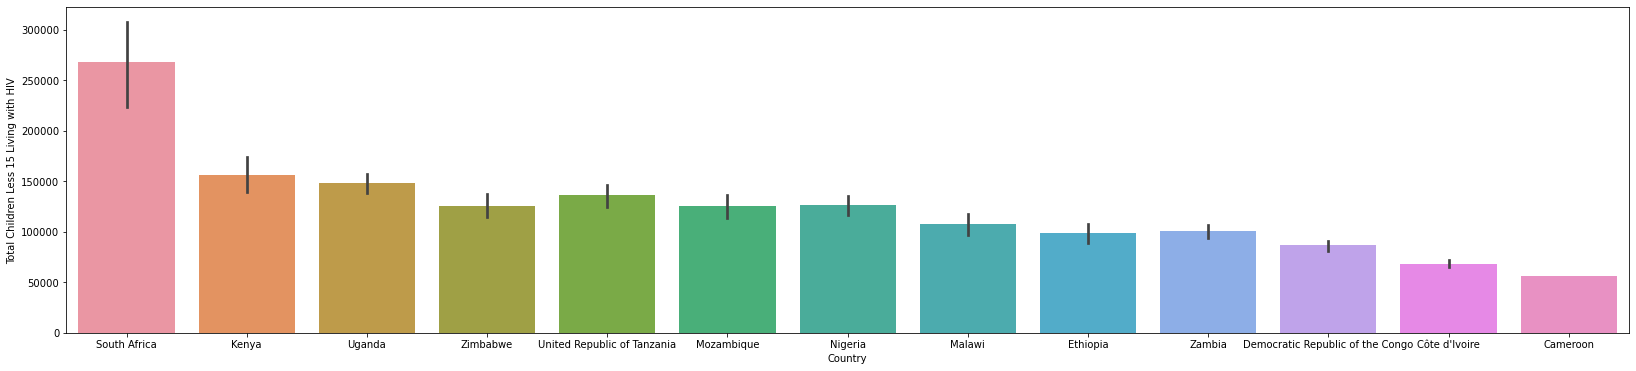

In [388]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Total Children Less 15 Living with HIV',
    data=df.nlargest(320, 'Total Children Less 15 Living with HIV')
)

In [384]:
df['Total Adults Above 15 Living with HIV'].sum()

578086800

In [385]:
#To show the Top 15 Countries with the highest rate of Total Adults Above 15 Living with HIV in Percentage:

df.groupby('Country').sum()['Total Adults Above 15 Living with HIV'].sort_values(ascending = False)[:15]/578086800*100

Country
South Africa                        21.756248
Kenya                                6.464427
Zimbabwe                             6.339878
United Republic of Tanzania          5.974881
Nigeria                              5.708485
Mozambique                           5.394519
Uganda                               5.199911
Zambia                               4.810696
Malawi                               4.134327
Thailand                             3.295353
Ethiopia                             3.156965
Côte d'Ivoire                        2.548060
Democratic Republic of the Congo     2.354318
Cameroon                             1.915456
Botswana                             1.397541
Name: Total Adults Above 15 Living with HIV, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Total Adults Above 15 Living with HIV'>

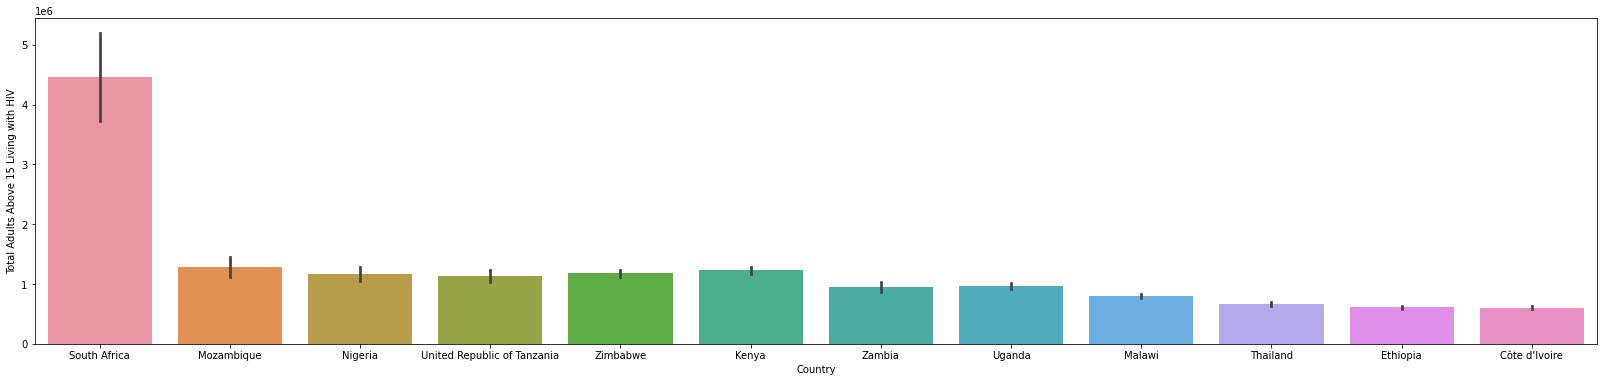

In [386]:
plt.figure(figsize=(28,6))
sns.barplot(
    x='Country',
    y='Total Adults Above 15 Living with HIV',
    data=df.nlargest(320, 'Total Adults Above 15 Living with HIV')
)

In [41]:
df.pivot_table(index = ['Year'], values = ['All Deaths','All Adult AIDS Cases 15 and Above','Total People Living with HIV','All Adult AIDS Cases 15 and Above'])

All Adult AIDS Cases 15 and Above  All Adult AIDS Cases 15 and Above  \
Year                                                                         
1990                       15921.348315                       15921.348315   
1991                       17983.146067                       17983.146067   
1992                       19652.808989                       19652.808989   
1993                       20266.292135                       20266.292135   
1994                       20819.101124                       20819.101124   
1995                       20939.325843                       20939.325843   
1996                       20879.775281                       20879.775281   
1997                       20794.382022                       20794.382022   
1998                       20349.438202                       20349.438202   
1999                       20156.179775                       20156.179775   
2000                       19716.853933                       19716.853933   
2001                       19113.483146                       19113.483146   
2002                       18677.528090                       18677.528090   
2003                       18116.853933                       18116.853933   
2004                       17531.460674                       17531.460674   
2005                       17216.853933                       17216.853933   
2006                       16744.943820                       16744.943820   
2007                       16434.831461                       16434.831461   
2008                       16131.460674                       16131.460674   
2009                       15962.921348                       15962.921348   
2010                       15746.067416                       15746.067416   
2011                       15362.921348                       15362.921348   
2012                       14938.202247                       14938.202247   
2013                       14356.179775                       14356.179775   
2014                       13688.764045                       13688.764045   
2015                       13271.910112                       13271.910112   
2016                       12721.348315                       12721.348315   
2017                       12098.876404                       12098.876404   
2018                       11434.831461                       11434.831461   
2019                       10952.808989                       10952.808989   
2020                       10170.786517                       10170.786517   

        All Deaths  Total People Living with HIV  
Year                                              
1990   2932.584270                  69092.134831  
1991   3673.033708                  85840.449438  
1992   4532.584270                 103644.943820  
1993   5564.044944                 120894.382022  
1994   6676.404494                 137278.651685  
1995   7803.370787                 154667.415730  
1996   9028.089888                 170474.157303  
1997  10292.134831                 183707.865169  
1998  11529.213483                 197570.786517  
1999  12747.191011                 208517.977528  
2000  13929.213483                 216276.404494  
2001  15038.202247                 223167.415730  
2002  15832.584270                 229933.707865  
2003  16646.067416                 234849.438202  
2004  16968.539326                 240366.292135  
2005  16689.887640                 243122.471910  
2006  16192.134831                 247356.179775  
2007  14930.337079                 251414.606742  
2008  13444.943820                 255752.808989  
2009  12084.269663                 261710.112360  
2010  10967.415730                 269600.000000  
2011  10253.932584                 275292.134831  
2012   9434.831461                 279770.786517  
2013   8770.786517                 287671.910112  
2014   8164.044944                 292762.921348  
2015   7702.247191                 300901.123596  
201

In [42]:
#Extracting some African Countries from the main Data set

Africa_Country = df[(df['Country']=='Nigeria') |
   (df['Country']=='Ghana')| 
   (df['Country']=='Chad') | 
   (df['Country']=='Benin') | 
   (df['Country']=='Cameroon') | 
   (df['Country']=='Gabon') | 
   (df['Country']=='Gambia') | 
   (df['Country']=='Senegal') | 
   (df['Country']=='Mali') | 
   (df['Country']=='Rwanda') | 
   (df['Country']=='Kenya') | 
   (df['Country']=='Niger') | 
   (df['Country']=='South Africa')]

In [43]:
# Deeper filtering to restrict the result to a few Year

af_con_year = Africa_Country[(Africa_Country['Year'] == 2016) | 
                             (Africa_Country['Year'] == 2017) | 
                             (Africa_Country['Year'] == 2018) | 
                             (Africa_Country['Year'] == 2019) | 
                             (Africa_Country['Year'] == 2020)]

In [44]:
af_con_year

Country  Year  Children Ophaned Below 17  Adults Death Above 15  \
2320         Benin  2016                      41000                   1400   
2326      Cameroon  2016                     400000                  20000   
2327          Chad  2016                      83000                   2100   
2342         Gabon  2016                      28000                   1000   
2343        Gambia  2016                      18000                   1000   
...            ...   ...                        ...                    ...   
2728         Niger  2020                      47000                   1000   
2729       Nigeria  2020                     880000                  37000   
2736        Rwanda  2020                      90000                   2100   
2738       Senegal  2020                      41000                   1000   
2741  South Africa  2020                    1600000                  79000   

      All Deaths  All Children Death Below 14  All Female Deaths Above 15  \
2320        2600                         1100                        1000   
2326       24000                         3900                       11000   
2327        3400                         1300                        1100   
2342        1400                          500                        1000   
2343        1300                          500                        1000   
...          ...                          ...                         ...   
2728        1100                          500                         500   
2729       49000                        12000                       16000   
2736        2500                          500                        1000   
2738        1100                          500                         500   
2741       83000                         3900                       29000   

      All Male Deaths Above 15  Percentage_Men 15-49 Living with AIDS  \
2320                      1000                                    1.1   
2326                      8600                                    3.5   
2327                      1000                                    1.3   
2342                       500                                    3.5   
2343                      1000                                    1.9   
...                        ...                                    ...   
2728                       500                                    0.2   
2729                     20000                                    1.3   
2736                      1100                                    2.5   
2738                      1000                                    0.3   
2741                     49000                                   19.1   

      Percentage_Men 15-24 Living with AIDS  \
2320                                    0.3   
2326                                    0.7   
2327                                    0.4   
2342                                    0.5   
2343                                    0.2   
...                                     ...   
2728                                    0.1   
2729                                    0.3   
2736                                    0.7   
2738                                    0.1   
2741                                    3.5   

      Percentage_Women 15-24 Living with AIDS  Adults AIDS Cases 15-49  \
2320                                      0.6                     2100   
2326                                      1.8                    17000   
2327                                      0.7                     3000   
2342                                      1.6                     1000   
2343                                      0.5                     1600   
...                                       ...                      ...   
2728                                      0.1                     1000   
2729                                      0.6                    61000   
2736                                     

In [45]:
#Loadin the filtered Data set

af_con_year.iloc[-5:]

Country  Year  Children Ophaned Below 17  Adults Death Above 15  \
2728         Niger  2020                      47000                   1000   
2729       Nigeria  2020                     880000                  37000   
2736        Rwanda  2020                      90000                   2100   
2738       Senegal  2020                      41000                   1000   
2741  South Africa  2020                    1600000                  79000   

      All Deaths  All Children Death Below 14  All Female Deaths Above 15  \
2728        1100                          500                         500   
2729       49000                        12000                       16000   
2736        2500                          500                        1000   
2738        1100                          500                         500   
2741       83000                         3900                       29000   

      All Male Deaths Above 15  Percentage_Men 15-49 Living with AIDS  \
2728                       500                                    0.2   
2729                     20000                                    1.3   
2736                      1100                                    2.5   
2738                      1000                                    0.3   
2741                     49000                                   19.1   

      Percentage_Men 15-24 Living with AIDS  \
2728                                    0.1   
2729                                    0.3   
2736                                    0.7   
2738                                    0.1   
2741                                    3.5   

      Percentage_Women 15-24 Living with AIDS  Adults AIDS Cases 15-49  \
2728                                      0.1                     1000   
2729                                      0.6                    61000   
2736                                      1.1                     3500   
2738                                      0.1                     1000   
2741                                     10.4                   200000   

      Adults Male Cases 15 and Above  Adults Female Cases 15 and Above  \
2728                             500                               500   
2729                           25000                             39000   
2736                            1200                              2500   
2738                             500                               500   
2741                           77000                            140000   

      Children AIDS Cases 0-14  Total AIDS Cases  \
2728                       500              1200   
2729                     21000             86000   
2736                      1000              4200   
2738                       500              1200   
2741                     12000            230000   

      All Adult AIDS Cases 15 and Above  \
2728                               1000   
2729                              65000   
2736                               3700   
2738                               1000   
2741                             220000   

      HIV Rate Adults per 1000 15 and Above  Total People Living with HIV  \
2728                                   0.06                         31000   
2729                                   0.53                       1700000   
2736                                   0.51                        220000   
2738                                   0.10                         39000   
2741                                   6.42                       7800000   

      Total Males Adults Above 15 Living with HIV  \
2728                                        12000   
2729                                       650000   
2736                                        80000   
2738                                        14000   
2741                                      2700000   

      Total Females Adults Above 15 Living with HIV  \
2728                                          17000   
272

In [46]:
#Slicing the data set to extract Nigerian features
af_con_year.iloc[-4]

Country                                          Nigeria
Year                                                2020
Children Ophaned Below 17                         880000
Adults Death Above 15                              37000
All Deaths                                         49000
All Children Death Below 14                        12000
All Female Deaths Above 15                         16000
All Male Deaths Above 15                           20000
Percentage_Men 15-49 Living with AIDS                1.3
Percentage_Men 15-24 Living with AIDS                0.3
Percentage_Women 15-24 Living with AIDS              0.6
Adults AIDS Cases 15-49                            61000
Adults Male Cases 15 and Above                     25000
Adults Female Cases 15 and Above                   39000
Children AIDS Cases 0-14                           21000
Total AIDS Cases                                   86000
All Adult AIDS Cases 15 and Above                  65000
HIV Rate Adults per 1000 15 and

In [47]:
#Slicing and Dicing to features

af_con_year.iloc[:,0:6]

Country  Year  Children Ophaned Below 17  Adults Death Above 15  \
2320         Benin  2016                      41000                   1400   
2326      Cameroon  2016                     400000                  20000   
2327          Chad  2016                      83000                   2100   
2342         Gabon  2016                      28000                   1000   
2343        Gambia  2016                      18000                   1000   
...            ...   ...                        ...                    ...   
2728         Niger  2020                      47000                   1000   
2729       Nigeria  2020                     880000                  37000   
2736        Rwanda  2020                      90000                   2100   
2738       Senegal  2020                      41000                   1000   
2741  South Africa  2020                    1600000                  79000   

      All Deaths  All Children Death Below 14  
2320        2600                         1100  
2326       24000                         3900  
2327        3400                         1300  
2342        1400                          500  
2343        1300                          500  
...          ...                          ...  
2728        1100                          500  
2729       49000                        12000  
2736        2500                          500  
2738        1100                          500  
2741       83000                         3900  

[65 rows x 6 columns]

In [48]:
#Extracting some features

af_con_year.iloc[:,[0,8,9,10]]

Country  Percentage_Men 15-49 Living with AIDS  \
2320         Benin                                    1.1   
2326      Cameroon                                    3.5   
2327          Chad                                    1.3   
2342         Gabon                                    3.5   
2343        Gambia                                    1.9   
...            ...                                    ...   
2728         Niger                                    0.2   
2729       Nigeria                                    1.3   
2736        Rwanda                                    2.5   
2738       Senegal                                    0.3   
2741  South Africa                                   19.1   

      Percentage_Men 15-24 Living with AIDS  \
2320                                    0.3   
2326                                    0.7   
2327                                    0.4   
2342                                    0.5   
2343                                    0.2   
...                                     ...   
2728                                    0.1   
2729                                    0.3   
2736                                    0.7   
2738                                    0.1   
2741                                    3.5   

      Percentage_Women 15-24 Living with AIDS  
2320                                      0.6  
2326                                      1.8  
2327                                      0.7  
2342                                      1.6  
2343                                      0.5  
...                                       ...  
2728                                      0.1  
2729                                      0.6  
2736                                      1.1  
2738                                      0.1  
2741                                     10.4  

[65 rows x 4 columns]

In [49]:
#Extracting some features

af_con_year.iloc[:,[0,8,9,10]]

Country  Percentage_Men 15-49 Living with AIDS  \
2320         Benin                                    1.1   
2326      Cameroon                                    3.5   
2327          Chad                                    1.3   
2342         Gabon                                    3.5   
2343        Gambia                                    1.9   
...            ...                                    ...   
2728         Niger                                    0.2   
2729       Nigeria                                    1.3   
2736        Rwanda                                    2.5   
2738       Senegal                                    0.3   
2741  South Africa                                   19.1   

      Percentage_Men 15-24 Living with AIDS  \
2320                                    0.3   
2326                                    0.7   
2327                                    0.4   
2342                                    0.5   
2343                                    0.2   
...                                     ...   
2728                                    0.1   
2729                                    0.3   
2736                                    0.7   
2738                                    0.1   
2741                                    3.5   

      Percentage_Women 15-24 Living with AIDS  
2320                                      0.6  
2326                                      1.8  
2327                                      0.7  
2342                                      1.6  
2343                                      0.5  
...                                       ...  
2728                                      0.1  
2729                                      0.6  
2736                                      1.1  
2738                                      0.1  
2741                                     10.4  

[65 rows x 4 columns]

In [50]:
#Extracting some features for Nigeria

af_con_year.iloc[-4,0:8]

Country                        Nigeria
Year                              2020
Children Ophaned Below 17       880000
Adults Death Above 15            37000
All Deaths                       49000
All Children Death Below 14      12000
All Female Deaths Above 15       16000
All Male Deaths Above 15         20000
Name: 2729, dtype: object

In [51]:
#Extracting some features for Niger

af_con_year.iloc[-5,0:17]

Country                                    Niger
Year                                        2020
Children Ophaned Below 17                  47000
Adults Death Above 15                       1000
All Deaths                                  1100
All Children Death Below 14                  500
All Female Deaths Above 15                   500
All Male Deaths Above 15                     500
Percentage_Men 15-49 Living with AIDS        0.2
Percentage_Men 15-24 Living with AIDS        0.1
Percentage_Women 15-24 Living with AIDS      0.1
Adults AIDS Cases 15-49                     1000
Adults Male Cases 15 and Above               500
Adults Female Cases 15 and Above             500
Children AIDS Cases 0-14                     500
Total AIDS Cases                            1200
All Adult AIDS Cases 15 and Above           1000
Name: 2728, dtype: object

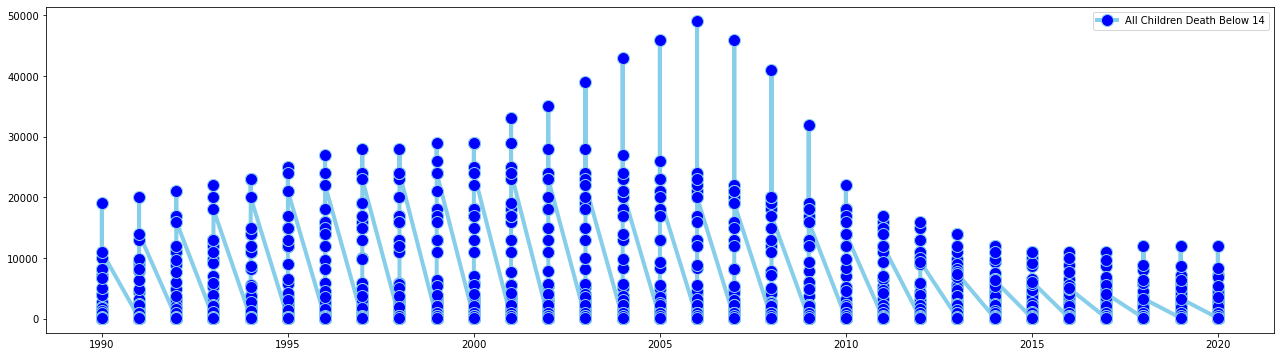

In [52]:
#To see the trend of All Children Death Below 14 across the years:

# multiple line plots
plt.rcParams["figure.figsize"] = (22,6)
plt.plot( 'Year', 'All Children Death Below 14', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'Year', 'Total AIDS Cases', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'Year', 'All Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

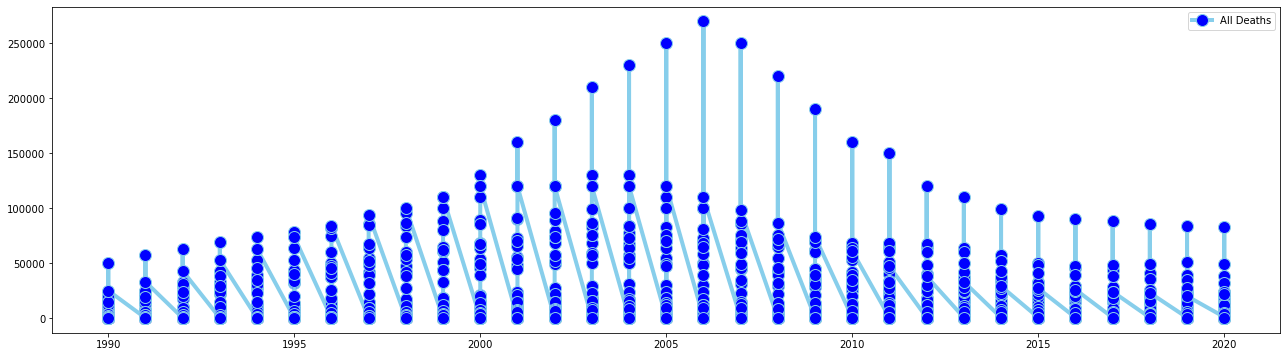

In [53]:
#To see the trend of All Deaths across the years:

# multiple line plots
plt.rcParams["figure.figsize"] = (22,6)
plt.plot( 'Year', 'All Deaths', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'Year', 'Total AIDS Cases', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'Year', 'All Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

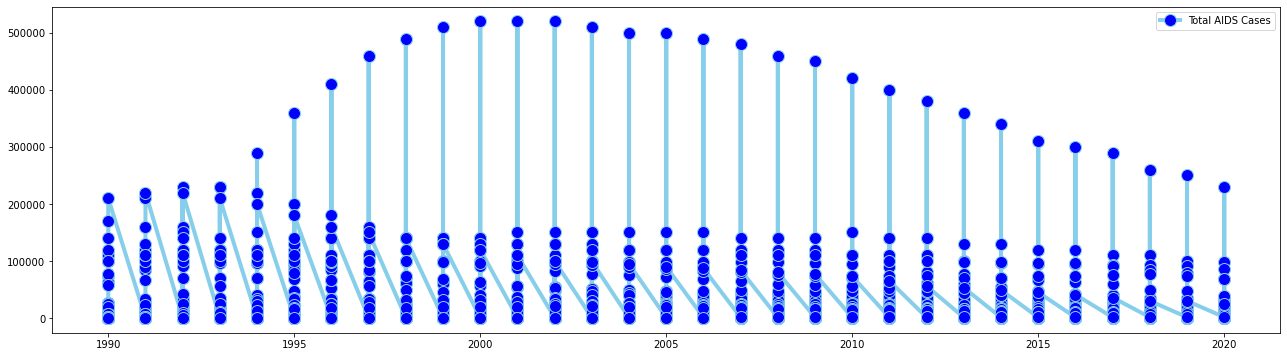

In [55]:
#To see the trend of Total AIDS Cases across the years:

# multiple line plots
plt.rcParams["figure.figsize"] = (22,6)
plt.plot( 'Year', 'Total AIDS Cases', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'Year', 'Total AIDS Cases', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'Year', 'All Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

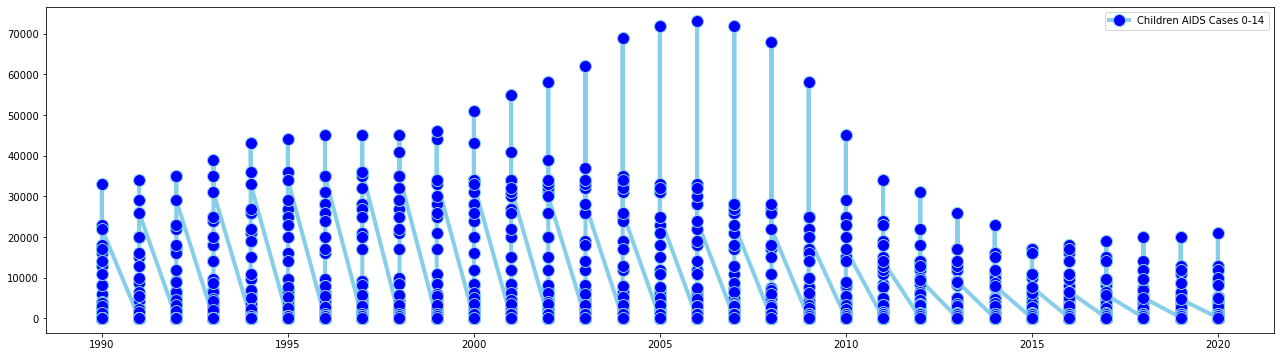

In [56]:
#To see the trend of Children AIDS Cases 0-14 across the years:

# multiple line plots
plt.rcParams["figure.figsize"] = (22,6)
plt.plot( 'Year', 'Children AIDS Cases 0-14', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'Year', 'Total AIDS Cases', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'Year', 'All Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

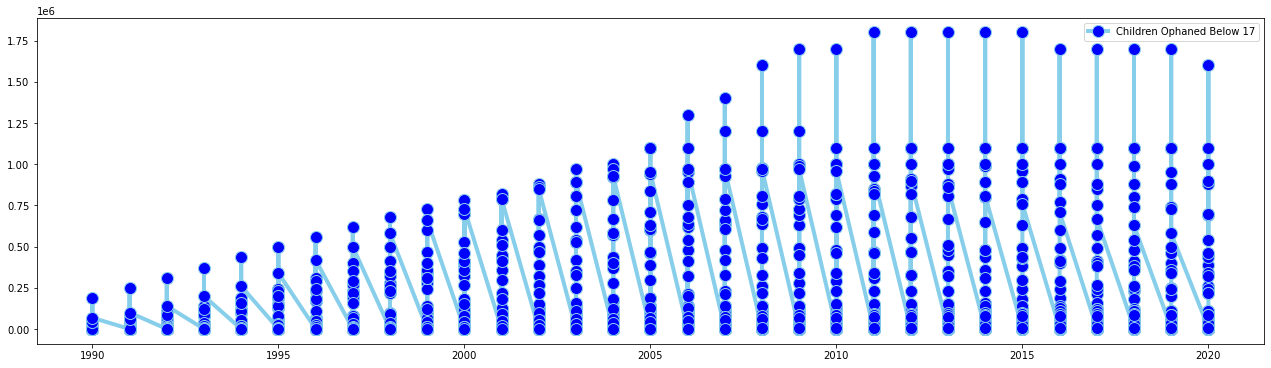

In [57]:
#To see the trend of Children Ophaned Below 17 across the years:

# multiple line plots
plt.rcParams["figure.figsize"] = (22,6)
plt.plot( 'Year', 'Children Ophaned Below 17', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'Year', 'Total AIDS Cases', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'Year', 'All Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

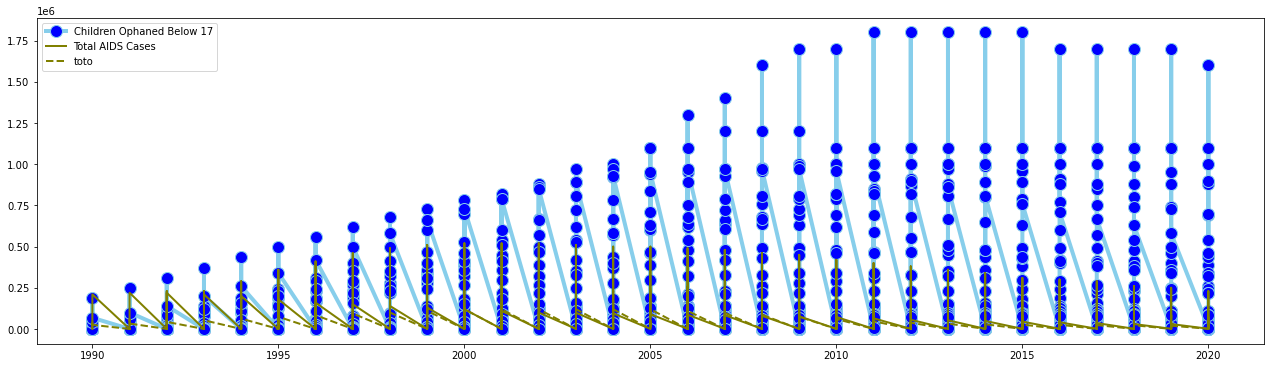

In [58]:
#To see the trend of Children Ophaned Below 17,Total AIDS Cases & All Deaths across the years:

# multiple line plots
plt.rcParams["figure.figsize"] = (22,6)
plt.plot( 'Year', 'Children Ophaned Below 17', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Year', 'Total AIDS Cases', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'Year', 'All Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

### Percantage Comparison of Death Rates between Nigeria and Pakistan in 2019 and 2020

In [59]:
#Filtering the data set to extarct those for Pakhistan specifically for all All Deaths

Pakistan19_20 = df[(df['Country'] == 'Pakistan') & (df['Year'] == 2019) | (df['Year'] == 2020) & (df['All Deaths'] >0)]

In [60]:
Pakistan19_20 = df[['Country','Year','All Deaths']]
Pakistan19_20[Pakistan19_20['Country'].str.contains("Pakistan")]

Country  Year  All Deaths
60    Pakistan  1990         100
149   Pakistan  1991         100
238   Pakistan  1992         100
327   Pakistan  1993         100
416   Pakistan  1994         100
505   Pakistan  1995         100
594   Pakistan  1996         100
683   Pakistan  1997         100
772   Pakistan  1998         100
861   Pakistan  1999         100
950   Pakistan  2000         100
1039  Pakistan  2001         100
1128  Pakistan  2002         100
1217  Pakistan  2003         100
1306  Pakistan  2004         100
1395  Pakistan  2005         100
1484  Pakistan  2006         200
1573  Pakistan  2007         500
1662  Pakistan  2008        1000
1751  Pakistan  2009        1000
1840  Pakistan  2010        1400
1929  Pakistan  2011        1900
2018  Pakistan  2012        2600
2107  Pakistan  2013        3300
2196  Pakistan  2014        4200
2285  Pakistan  2015        4900
2374  Pakistan  2016        5700
2463  Pakistan  2017        6300
2552  Pakistan  2018        6900
2641  Pakistan  2019        7800
2730  Pakistan  2020        8200

In [61]:
# A function to calculate the percenatge change in Death Rates

def get_changePakistan(current, previous):
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0

In [62]:
#Percantage Increase in Death Rate 
b = get_changePakistan(8200, 7800)
b

5.128205128205128

In [63]:
#Filtering the data set to extarct those for Nigerian specifically for all All Deaths

Nigeriadf = df[(df['Country'] == 'Nigeria') & (df['Year'] == 2019) | (df['Year'] == 2020) & (df['All Deaths'] >0)]
Nigeriadf

Country  Year  Children Ophaned Below 17  \
2640                             Nigeria  2019                     880000   
2670                         Afghanistan  2020                       6700   
2671                             Algeria  2020                       1500   
2672                              Angola  2020                     260000   
2673                           Argentina  2020                      25000   
...                                  ...   ...                        ...   
2754  Venezuela (Bolivarian Republic of)  2020                      39000   
2755                            Viet Nam  2020                      83000   
2756                               Yemen  2020                       5500   
2757                              Zambia  2020                     700000   
2758                            Zimbabwe  2020                     540000   

      Adults Death Above 15  All Deaths  All Children Death Below 14  \
2640                  39000       51000                        12000   
2670                    500        1000                          100   
2671                    200         200                          100   
2672                  12000       16000                         4500   
2673                   1400        1400                          100   
...                     ...         ...                          ...   
2754                   3900        4200                          500   
2755                   3700        3800                          100   
2756                    500         500                          100   
2757                  19000       24000                         5300   
2758                  19000       22000                         3500   

      All Female Deaths Above 15  All Male Deaths Above 15  \
2640                       17000                     22000   
2670                         200                       500   
2671                         100                       100   
2672                        6900                      5000   
2673                         500                      1100   
...                          ...                       ...   
2754                        2500                      1400   
2755                        1000                      2900   
2756                         100                       200   
2757                       10000                      8700   
2758                        9500                      9300   

      Percentage_Men 15-49 Living with AIDS  \
2640                                    1.3   
2670                                    0.1   
2671                                    0.1   
2672                                    1.8   
2673                                    0.4   
...                                     ...   
2754                                    0.5   
2755                                    0.3   
2756                                    0.1   
2757                                   11.1   
2758                                   11.9   

      Percentage_Men 15-24 Living with AIDS  \
2640                                    0.3   
2670                                    0.1   
2671                                    0.1   
2672                                    0.4   
2673                                    0.1   
...                                     ...   
2754                                    0.1   
2755                                    0.1   
2756                                    0.1   
2757                                    2.3   
2758                                    2.9   

      Percentage_Women 15-24 Living with AIDS  Adults AIDS Cases 15-49  \
2640                                      0.6                    67000   
2670                                      0.1                     1400   
2671                                      0.1                     1400   
2672                                      1.0                    16000  

In [64]:
Nigeria19_20 = df[['Country','Year','All Deaths']]
Nigeria19_20[Nigeria19_20['Country'].str.contains("Nigeria")]

Country  Year  All Deaths
59    Nigeria  1990       12000
148   Nigeria  1991       16000
237   Nigeria  1992       20000
326   Nigeria  1993       24000
415   Nigeria  1994       30000
504   Nigeria  1995       35000
593   Nigeria  1996       41000
682   Nigeria  1997       48000
771   Nigeria  1998       54000
860   Nigeria  1999       61000
949   Nigeria  2000       67000
1038  Nigeria  2001       73000
1127  Nigeria  2002       79000
1216  Nigeria  2003       83000
1305  Nigeria  2004       84000
1394  Nigeria  2005       83000
1483  Nigeria  2006       81000
1572  Nigeria  2007       76000
1661  Nigeria  2008       76000
1750  Nigeria  2009       70000
1839  Nigeria  2010       68000
1928  Nigeria  2011       68000
2017  Nigeria  2012       67000
2106  Nigeria  2013       60000
2195  Nigeria  2014       52000
2284  Nigeria  2015       48000
2373  Nigeria  2016       47000
2462  Nigeria  2017       48000
2551  Nigeria  2018       49000
2640  Nigeria  2019       51000
2729  Nigeria  2020       49000

In [65]:
Nigeriadf = df[['Country','Year','All Deaths']]

In [66]:
#Filtering the data set to extarct those for Pakhistan specifically for all All Deaths and assigning the result to a new Variable
nigdeaths19_20 = Nigeriadf[(Nigeriadf['Country'] == 'Nigeria') & (Nigeriadf['Year'] == 2019) | (Nigeriadf['Year'] == 2020) & (Nigeriadf['All Deaths'] >0)]

In [67]:
nigdeaths19_20[nigdeaths19_20['Country'].str.contains("Nigeria")]

Country  Year  All Deaths
2640  Nigeria  2019       51000
2729  Nigeria  2020       49000

In [68]:
# A function to calculate the percenatge change in Death Rates

def get_changeNigeria(current, previous):
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0

In [71]:
a = get_changeNigeria(49000, 51000)

In [72]:
print("Nigeria with an estimated population of over 206 million as at 2022 has a ", a,'% decrease in death rate between 2019 and 2020 and seems to perform better than Pakistan which shares about the same population of over 220 million with an increased death of', b,'%')
a = get_changeNigeria(49000, 51000)

Nigeria with an estimated population of over 206 million as at 2022 has a  3.9215686274509802 % decrease in death rate between 2019 and 2020 and seems to perform better than Pakistan which shares about the same population of over 220 million with an increased death of 5.128205128205128 %


In [73]:
#Slicing the DataFrame for the variable sto be used for Correlation assessment
dfcorr = df[['Year','Children Ophaned Below 17','All Deaths', 
               'All Children Death Below 14', 
               'All Female Deaths Above 15',
               'All Male Deaths Above 15',
               'Adults AIDS Cases 15-49',
               'Adults Male Cases 15 and Above', 
               'Adults Female Cases 15 and Above',
               'Children AIDS Cases 0-14', 'Total AIDS Cases',
               'All Adult AIDS Cases 15 and Above',
               'HIV Rate Adults per 1000 15 and Above', 'Total People Living with HIV',
               'Total Males Adults Above 15 Living with HIV',
               'Total Females Adults Above 15 Living with HIV',
               'Total Children Less 15 Living with HIV',
               'Total Adults Above 15 Living with HIV']]

In [74]:
#Descriptive Summary view of the selected Variables
dfcorr.describe().T

count           mean  \
Year                                           2759.0    2005.000000   
Children Ophaned Below 17                      2759.0  104293.584632   
All Deaths                                     2759.0   10171.801377   
All Children Death Below 14                    2759.0    2498.767669   
All Female Deaths Above 15                     2759.0    4134.034070   
All Male Deaths Above 15                       2759.0    3710.982240   
Adults AIDS Cases 15-49                        2759.0   15690.685031   
Adults Male Cases 15 and Above                 2759.0    7341.210584   
Adults Female Cases 15 and Above               2759.0    9440.376948   
Children AIDS Cases 0-14                       2759.0    3762.812613   
Total AIDS Cases                               2759.0   20377.056905   
All Adult AIDS Cases 15 and Above              2759.0   16714.570497   
HIV Rate Adults per 1000 15 and Above          2759.0       2.446709   
Total People Living with HIV                   2759.0  229503.262051   
Total Males Adults Above 15 Living with HIV    2759.0   88794.309532   
Total Females Adults Above 15 Living with HIV  2759.0  120778.905401   
Total Children Less 15 Living with HIV         2759.0   20145.487495   
Total Adults Above 15 Living with HIV          2759.0  209527.654947   

                                                         std      min  \
Year                                                8.945893  1990.00   
Children Ophaned Below 17                      243708.699568   100.00   
All Deaths                                      23381.648703   100.00   
All Children Death Below 14                      5395.969671   100.00   
All Female Deaths Above 15                      10180.291610   100.00   
All Male Deaths Above 15                         8376.379071   100.00   
Adults AIDS Cases 15-49                         41952.698728   100.00   
Adults Male Cases 15 and Above                  18184.161485   100.00   
Adults Female Cases 15 and Above                26294.247159   100.00   
Children AIDS Cases 0-14                         8363.538494   100.00   
Total AIDS Cases                                51338.602880   100.00   
All Adult AIDS Cases 15 and Above               44282.254397   100.00   
HIV Rate Adults per 1000 15 and Above               5.475743     0.01   
Total People Living with HIV                   614009.939087   100.00   
Total Males Adults Above 15 Living with HIV    222765.938472   100.00   
Total Females Adults Above 15 Living with HIV  353383.147759   100.00   
Total Children Less 15 Living with HIV          45998.105241   100.00   
Total Adults Above 15 Living with HIV          573721.990654   100.00   

                                                   25%      50%        75%  \
Year                                           1997.00   2005.0    2013.00   
Children Ophaned Below 17                      1200.00  12000.0   66000.00   
All Deaths                                      500.00   1400.0    6600.00   
All Children Death Below 14                     100.00    500.0    1700.00   
All Female Deaths Above 15                      100.00    500.0    2400.00   
All Male Deaths Above 15                        100.00   1000.0    2800.00   
Adults AIDS Cases 15-49                        1000.00   2700.0   10000.00   
Adults Male Cases 15 and Above                  500.00   1600.0    5500.00   
Adults Female Cases 15 and Above                500.00   1100.0    5400.00   
Children AIDS Cases 0-14                        100.00    500.0    2500.00   
Total AIDS Cases                               1000.00   3600.0   13000.00   
All Adult AIDS Cases 15 and Above              1000.00   2900.0   11000.00   
HIV Rate Adults per 1000 15 and Above             0.14      0.4       1.86   
Total People Living with HIV                   7900.00  37000.0  140000.00   
Total Males Adults Above 15 Living with HIV    4300.00  17000.0   63000.00   
Total Females Adults Above 15 Living with H

<AxesSubplot:>

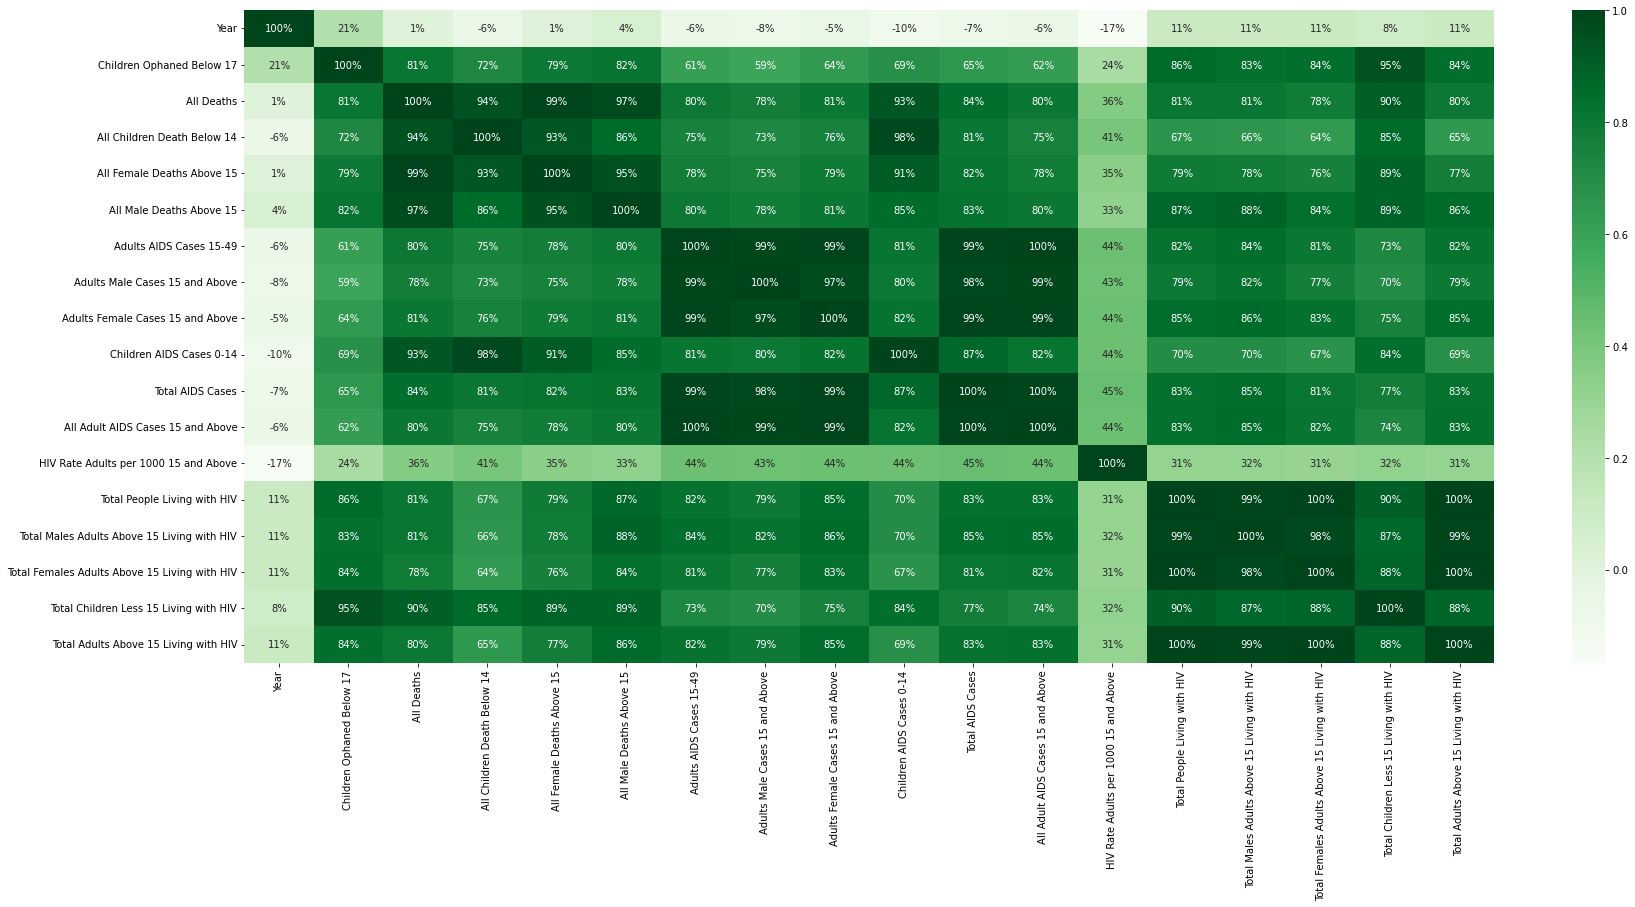

In [75]:
#A heatmap plot of the above selected variables
plt.figure(figsize=(28,12))
sns.heatmap(dfcorr.corr(),annot=True, cmap = 'Greens', fmt='.0%')


In [113]:
dfcorr

Year  Children Ophaned Below 17  All Deaths  \
0     1990                        100         100   
1     1990                        200         100   
2     1990                       1300        1000   
3     1990                        500         500   
4     1990                        100         100   
...    ...                        ...         ...   
2754  2020                      39000        4200   
2755  2020                      83000        3800   
2756  2020                       5500         500   
2757  2020                     700000       24000   
2758  2020                     540000       22000   

      All Children Death Below 14  All Female Deaths Above 15  \
0                             100                         100   
1                             100                         100   
2                             500                         200   
3                             100                         100   
4                             100                         100   
...                           ...                         ...   
2754                          500                        2500   
2755                          100                        1000   
2756                          100                         100   
2757                         5300                       10000   
2758                         3500                        9500   

      All Male Deaths Above 15  Adults AIDS Cases 15-49  \
0                          100                      100   
1                          100                      100   
2                          200                     2600   
3                          200                     4100   
4                          100                      100   
...                        ...                      ...   
2754                      1400                     1800   
2755                      2900                     5300   
2756                       200                     1000   
2757                      8700                    58000   
2758                      9300                    19000   

      Adults Male Cases 15 and Above  Adults Female Cases 15 and Above  \
0                                100                               100   
1                                100                               100   
2                               1200                              1700   
3                               3100                              1200   
4                                100                               100   
...                              ...                               ...   
2754                            1000                              1000   
2755                            3900                              2000   
2756                            1000                               500   
2757                           21000                             39000   
2758                            7300                             13000   

      Children AIDS Cases 0-14  Total AIDS Cases  \
0                          100               100   
1                          100               100   
2                         1000              3400   
3                          200              4500   
4                          100               100   
...                        ...               ...   
2754                       500              2200   
2755                       500              6100   
2756                       100              1100   
2757                      8300             69000   
2758                      5100             25000   

      All Adult AIDS Cases 15 and Above  \
0                                   100   
1                                   100   
2                                  2800   
3                                  4400   
4                                   100   
...                                 ...   
2754                               1900   
2755                 

In [115]:
#Saving the selected variables to CSV to my Local Machine

dfcorr.to_csv("AIDS.csv",index = False)

In [121]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'Country','All Children Death Below 14','All Female Deaths Above 15','All Male Deaths Above 15','Adults AIDS Cases 15-49','Adults Male Cases 15 and Above','Adults Female Cases 15 and Above','Children AIDS Cases 0-14','Total AIDS Cases'], values='All Deaths')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

The End